# Virus × EVE's classification

Imports

In [38]:
import io
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score, 
    recall_score, 
    precision_score,
    confusion_matrix, 
    roc_auc_score,
    roc_curve
    )
from sklearn.metrics import RocCurveDisplay, DetCurveDisplay

from sklearn.model_selection import GridSearchCV

Parameters

In [39]:
path_root = '/home/small_rna_metavir/src'
path_ds = f'{path_root}/ds/virus-eve/ds_virus-eves.tab'


Import data

In [40]:
# virus_eves = pd.read_table(io.BytesIO(uploaded['Virus_and_EVEs.tab']), index_col='V1')
virus_eves = pd.read_table(path_ds, index_col='V1')

## EDA

In [5]:
virus_eves.shape

(2315, 55)

In [6]:
virus_eves.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2315 entries, RKPM26_Contig120_119 to RNPM84_Contig11238_11237
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   run         2315 non-null   object 
 1   lib         2315 non-null   object 
 2   class       2315 non-null   object 
 3   name        2315 non-null   object 
 4   X15         2315 non-null   float64
 5   X16         2315 non-null   float64
 6   X17         2315 non-null   float64
 7   X18         2315 non-null   float64
 8   X19         2315 non-null   float64
 9   X20         2315 non-null   float64
 10  X21         2315 non-null   float64
 11  X22         2315 non-null   float64
 12  X23         2315 non-null   float64
 13  X24         2315 non-null   float64
 14  X25         2315 non-null   float64
 15  X26         2315 non-null   float64
 16  X27         2315 non-null   float64
 17  X28         2315 non-null   float64
 18  X29         2315 non-null   float6

In [10]:
#Conferindo se há NAs
# virus_eves.isna().sum().sort_values(ascending=False)[0:54]#por colunas
virus_eves.isnull().sum().sum() # no data frame inteiro

0

In [ ]:
#Visualizando as primeiras linhas
virus_eves.head()

,run,lib,class,name,X15,X16,X17,X18,X19,X20,...,X.35,dens15to18,dens20to22,dens25to29,ratiosi_pi,ratio_si,dens18to35,length,seq_fw,seq_bw
V1,,,,,,,,,,,,,,,,,,,,,
RKPM26_Contig120_119,caratinga,RKPM26,viral,Contig120_119,0.234105,0.124664,-0.027890,0.176621,0.021856,0.531474,...,-0.317521,1.846663,4.432182,0.073100,4.359081,0.700917,4.722421,481,CGGTGGCAACCCCCGCAAAACCCCGGTTCGTAGCTAGGATGCTTCC...,CCCGTGGTTCTGGGACACAACAGGCGCCGGTGACGACGAAACTTCT...
RKPM26_Contig1819_1818,caratinga,RKPM26,viral,Contig1819_1818,-0.072243,-0.062254,0.019318,0.064599,-0.004654,0.225080,...,-0.308636,2.211863,5.080056,0.903501,4.176555,0.376193,5.382808,1051,GGTCCGGCCGCCGCTGAGGCGGCGGTGTACTTTATCGCCTTGGTGA...,AAGCTTGAGAAATCTATAAAGTATTAGATTATCAAGCGCCACACAA...
RKPM26_Contig1820_1819,caratinga,RKPM26,viral,Contig1820_1819,0.013123,0.004374,0.306210,0.188100,0.017498,0.389324,...,-0.363078,0.536667,3.044934,-0.111031,3.155965,0.516932,3.465491,324,ACATGGTTTTGTGTTTTGCTATGGTGGGTGGAGGAGATTCCTCGCC...,ATCGCCACCATGGCCATGGAGTTGTCTGTGATGGTATTGAAGAGAC...
RKPM26_Contig1965_1964,caratinga,RKPM26,viral,Contig1965_1964,-0.028174,-0.017522,-0.034657,-0.015206,0.015824,0.272396,...,-0.351899,0.770070,3.764117,0.300516,3.463602,0.031964,4.171750,1887,TTTTCTCGAGGATACTCTGCATCACCTACAAGTGACCGGTAACTCG...,AACCATGTTTTGATGGGATTGTGCTAGAACTGGCATTTAAAGCTTC...
RKPM26_Contig1967_1966,caratinga,RKPM26,viral,Contig1967_1966,0.235742,0.065989,0.309045,0.363057,0.204878,0.224168,...,-0.346821,0.889817,3.127827,-0.824428,3.952256,0.470128,3.521716,340,ACGGAGGCCTCCGTTTCAGGCAAGTCGTTGGTTAATTTCATGTGTA...,CACTCGATGATAGTATCCGGATTCATGAACAAAATTGGAGGTGCAA...


In [11]:
virus_eves.describe() #explorando os atributos numéricos

,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,...,X.33,X.34,X.35,dens15to18,dens20to22,dens25to29,ratiosi_pi,ratio_si,dens18to35,length
count,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,...,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000
mean,0.241999,0.105378,0.043433,0.018521,0.061851,0.206638,2.295576,0.218679,0.156373,0.289062,...,-0.448284,-0.454135,-0.458553,-1.225841,0.171738,0.804165,-0.634031,1.214379,2.565175,628.533045
std,1.132029,0.798526,0.671314,0.563787,0.531206,0.551741,2.262872,0.510741,0.532020,0.604860,...,0.141395,0.143538,0.146613,2.641036,2.979563,2.209316,3.402365,1.791983,1.888941,793.321471
min,-0.907421,-0.715439,-0.936360,-0.911555,-0.902333,-0.784033,-0.650760,-0.532806,-0.659179,-0.611708,...,-1.045614,-1.045614,-1.045614,-8.581201,-8.417853,-6.426265,-9.072803,0.000000,-1.590069,200.000000
25%,-0.319725,-0.317665,-0.319970,-0.312512,-0.277020,-0.211421,-0.023095,-0.097488,-0.157907,-0.128266,...,-0.531783,-0.539706,-0.548408,-3.027005,-2.110801,-0.633509,-3.451838,0.106009,1.188216,249.000000
50%,-0.184576,-0.193612,-0.190750,-0.178662,-0.105057,0.065398,2.070854,0.090598,0.003414,0.130437,...,-0.418813,-0.422734,-0.425913,-1.144076,0.455617,0.640034,-0.711087,0.532757,2.296617,358.000000
75%,0.230041,0.154120,0.119332,0.103929,0.220479,0.475388,4.528564,0.398941,0.314111,0.514076,...,-0.350740,-0.355591,-0.356489,0.422402,2.350529,2.105876,1.455370,1.382892,3.795794,614.500000
max,6.836349,6.418098,5.266740,3.865223,5.097639,4.296929,6.613526,6.441316,6.607433,6.068682,...,-0.057846,-0.102924,-0.128916,10.757198,8.307461,8.261057,10.571063,13.005098,9.925617,8702.000000


### Organizando os dados em atributos(**X**) e classe(**y**):

In [41]:
X = virus_eves.iloc[:,4:52] # matriz de atributos das instâncias
y = virus_eves['class'] #vetor de rótulos das instâncias

print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X.shape: (2315, 48)
y.shape: (2315,)


In [43]:
y.value_counts() # distriuição dos rótulos para classificação

# Nitido desbalanço entra as classes é observado, ferei uma extratificação na hora de separar em treino e teste


viral    1321
eve       994
Name: class, dtype: int64

### Graphs

#### Visualizando a distribuição dos valores dos atributos

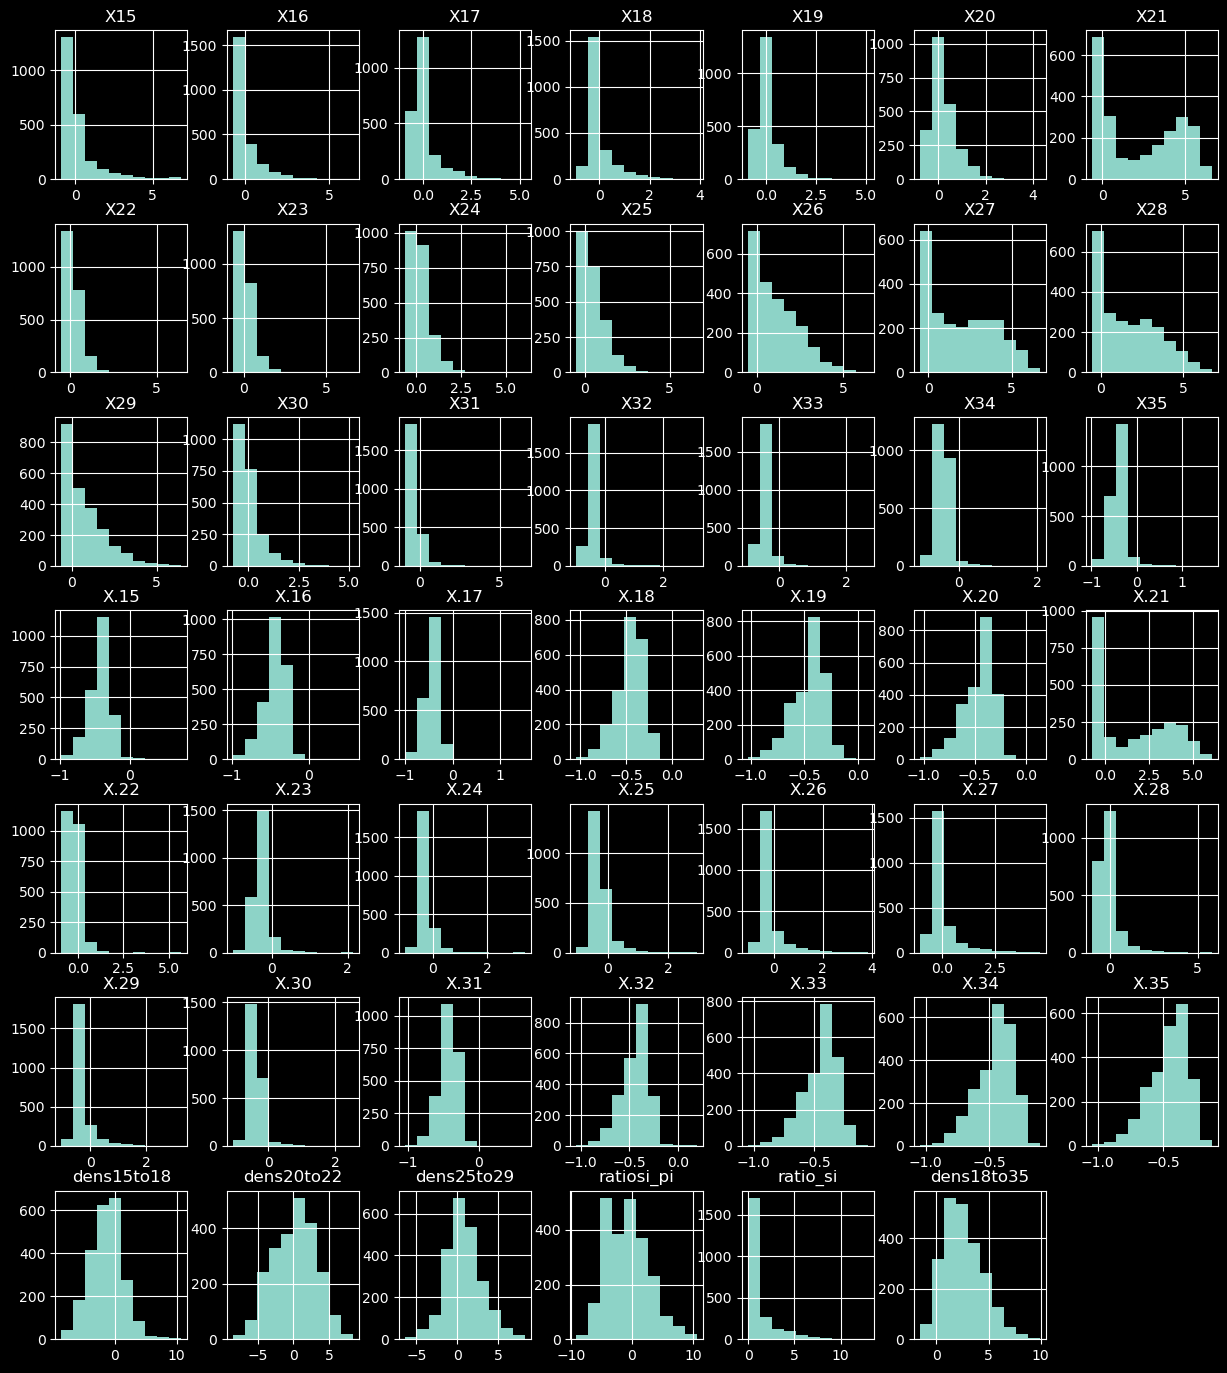

In [14]:
X.hist(figsize=(15,17))
plt.show()

#### Visualizando a distribuição dos valores dos atributos separando as classes de iinteresse (y)

In [185]:
# X.hist(figsize=(7,8))

# for i in virus_eves.columns[4:52]:

virus_eves.pivot(columns='class', values=virus_eves.columns[4])

class,eve,viral
V1,,
RKPM15_Contig2451_2450,-0.241928,NaN
RKPM15_Contig2622_2621,-0.323149,NaN
RKPM15_Contig541_540,-0.315142,NaN
RKPM26_Contig120_119,NaN,0.234105
RKPM26_Contig1819_1818,NaN,-0.072243
...,...,...
cell_Contig752_751,-0.335311,NaN
cell_Contig753_752,-0.334696,NaN
cell_Contig755_754,-0.321690,NaN


In [186]:
? virus_eves.pivot(columns='class', values= i).plot.hist

Object ` virus_eves.pivot(columns='class', values= i).plot.hist` not found.


<Figure size 50x100 with 0 Axes>

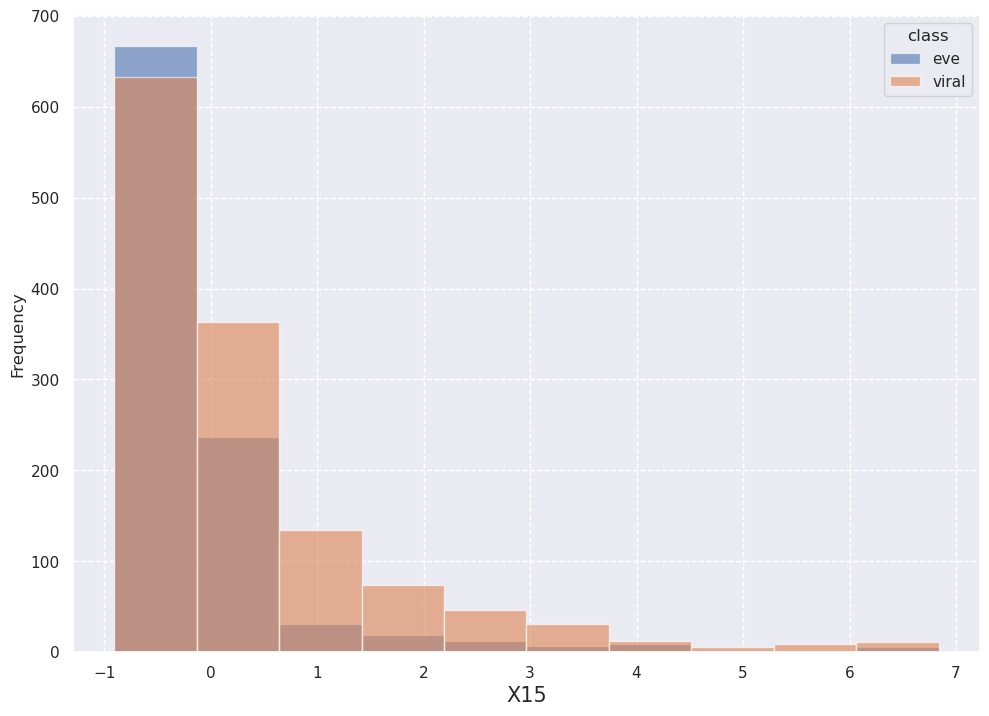

<Figure size 50x100 with 0 Axes>

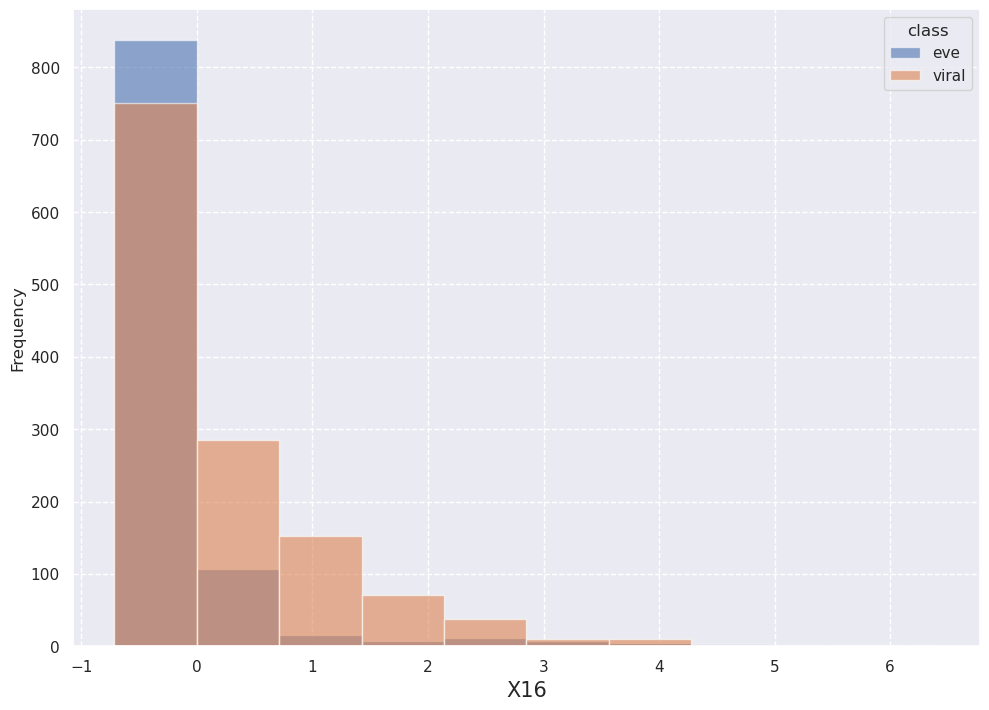

<Figure size 50x100 with 0 Axes>

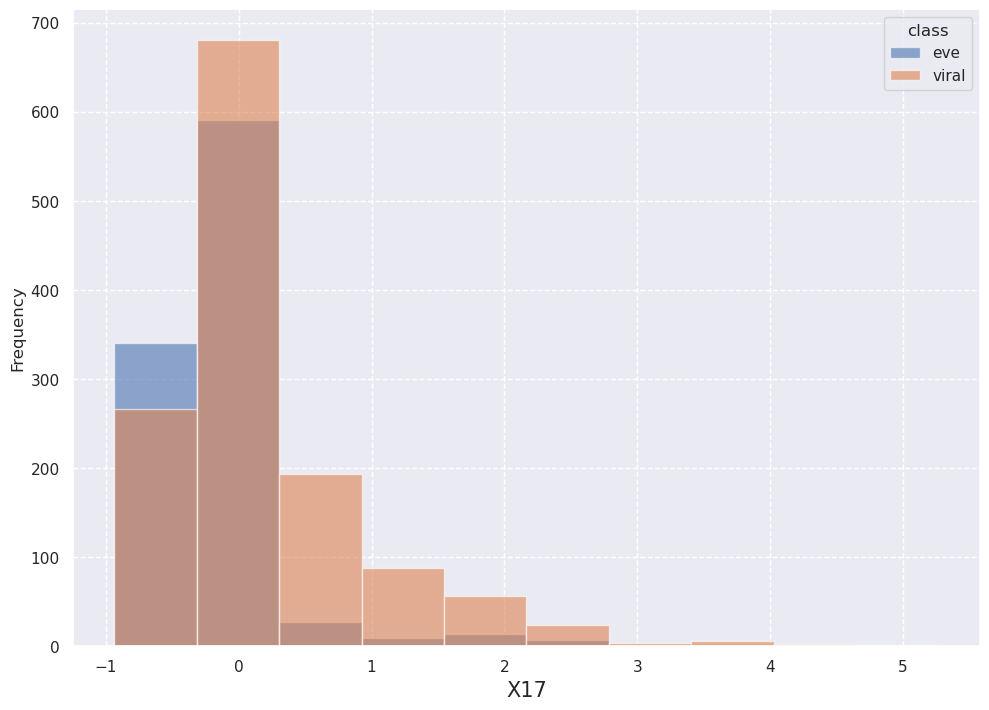

In [64]:
# X.hist(figsize=(7,8))

for i in virus_eves.columns[4:52]:
  plt.figure(figsize=(1, 2), dpi=50)
  virus_eves.pivot(columns='class', values= i).plot.hist(alpha=0.6)
  plt.xlabel(i, fontdict={'fontsize': 15})
  plt.grid(linestyle="--")
  plt.show()


---

A analise doa hiatogramas dos atributos considerando as classes "eve" e "viral" evidencia consistência da etapa de "engenharia de atributos"  que realizei com minha ferramenta "small RNA metavir"(https://github.com/JPbio/small_RNA_MetaVir/wiki/small-RNA-Metavir:-small-RNA-reads-for-big-viral-discoveries) . Buscar sinais da interação virus/hospedeiro no mar de moléculas sequenciadas em um experimento de RNA-seq é algo complexo que exige normalizações e processamentos especificas para esses dados. Um exemplo que considero um sucesso são as features "X21" e "X.21" que representam a quantidade normalizada de RNAs de 21 nucleotideos gerados pelo virus interagindo com o mosquito. Sabe-se pela literatura da imunologia de insetos, que altas concentracao de RNAs desse tamanho pode ser evidencia de um virus real interagindo com o hospedeiro, pois eves nao geram RNAs desse tamanho.

#### Classes distribution

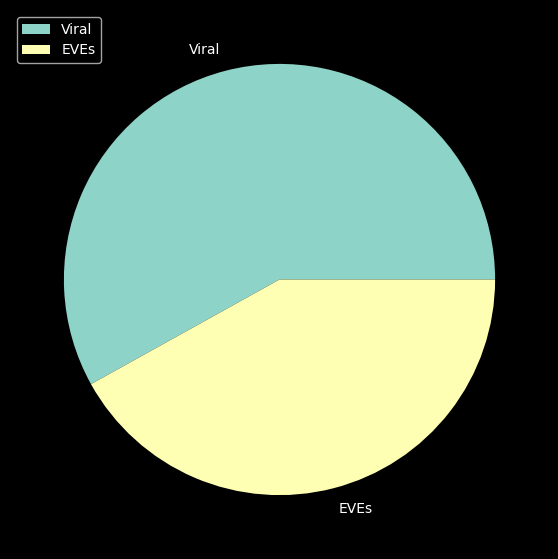

In [20]:
# y.value_counts()

label_counts = np.array([1321,954])
mylabels = ["Viral", "EVEs"]

plt.figure(figsize=(7,7))
plt.pie(label_counts, labels = mylabels)
# plt.legend()
plt.legend(loc=2, prop={'size': 10})
plt.show()


# Foo Bar

Extratificando os dados em treino e teste:

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y) # Reservand 30% das instâncias para teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape #conferindo as dimensões dos extratos de treino e teste


((1620, 48), (695, 48), (1620,), (695,))

Conferindo a presença apenas de dados numéricos na matriz de atributos:

In [80]:
set(X.dtypes)

{dtype('float64')}

**Normalização dos dados**
A matriz de atributos utilizada nesse trabalho é saída de uma ferramenta que estou construindo no meu doutorado "Small RNA Metavir" (https://github.com/JPbio/small_RNA_MetaVir) para processar dads de RNA-seq em larga escala e "mineirar" sequências virais. As features já sairam do pipeline de mineiração "normalizadas" com calculos que levam em conta peculiaridades das bibliotecas de RNA-seq (dado bruto) e utiliza "Z-score" ao final, tudo aplicado com scripts escritos em R. Portanto, não será necessário realizar normalizações para aplicaões de modelos de aprendizado nesse notebook.

### 2- Aplicação de algoritmos de aprendizado não supervisionados**

Os algoritmos nessa seção foram aplicados para visuazalição dos dados, reduções dimensionais e analises exploratórias da estrutração dos dados em relação as de interesse: "virus" e "eve".

#### 2.1 t-SNE _(t-Distributed Stochastic Neighbor Embedding)_



In [65]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns

In [66]:
tsne = TSNE(n_components=2, verbose=1,random_state=123) #computando o t-SNE
X_tsne = tsne.fit_transform(X) 

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2315 samples in 0.001s...
[t-SNE] Computed neighbors for 2315 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2315
[t-SNE] Computed conditional probabilities for sample 2000 / 2315
[t-SNE] Computed conditional probabilities for sample 2315 / 2315
[t-SNE] Mean sigma: 1.530579
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.069626
[t-SNE] KL divergence after 1000 iterations: 1.071881


[Text(0.5, 1.0, 'Projeção t-SNE sequências virais e eves')]

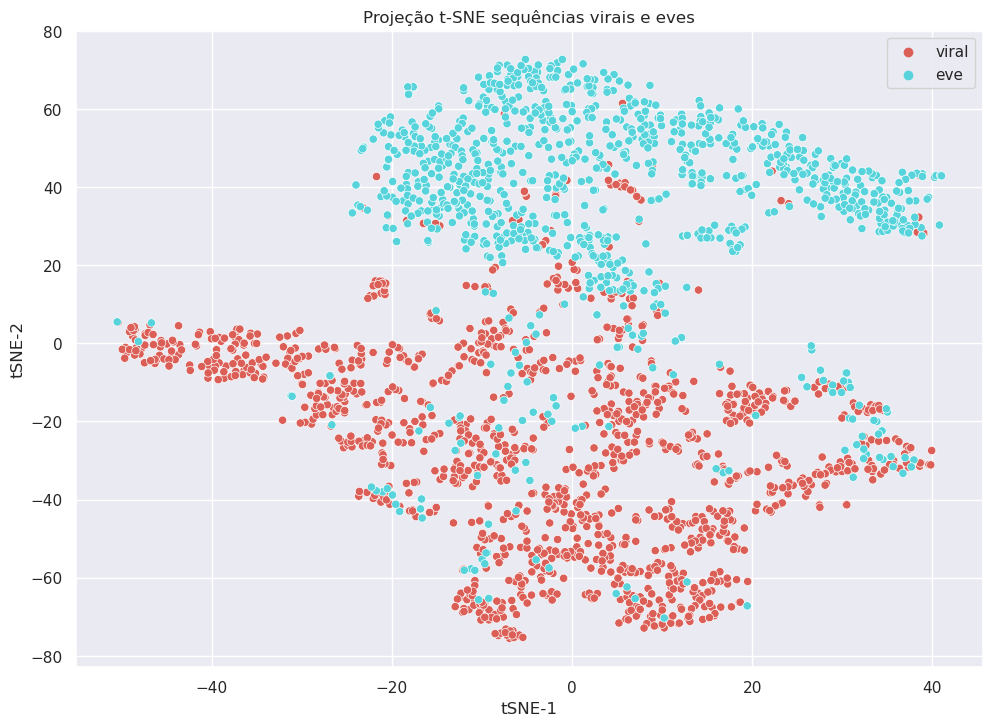

In [67]:
#Plotando o resultado e 2 dimensões para visualização
aux = pd.DataFrame()
aux["y"] = y
aux["tSNE-1"] = X_tsne[:,0]
aux["tSNE-2"] = X_tsne[:,1]

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="tSNE-1", y="tSNE-2", hue=aux.y.tolist(),
                palette=sns.color_palette("hls",2),
                data=aux).set(title="Projeção t-SNE sequências virais e eves") 

Podemos notar uma certa definição de duas "nuvens de dados" representando as duas classes de interesse nesse trabalho.

#### 2.2 PCA _(Pincipal Component Analysis)_

In [68]:
from sklearn.decomposition import PCA

In [69]:
# Computando componentes principais
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

In [70]:
# Conferindo dimensoes do resultado
print(X_pca.shape)

(2315, 3)


In [71]:
#Transformacoes dos dataframes apenas para ajustar a vizualizacao
aux1 = pd.DataFrame()
aux1["y"] = y
aux1["PC-1"] = X_pca[:,0]
aux1["PC-2"] = X_pca[:,1]

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

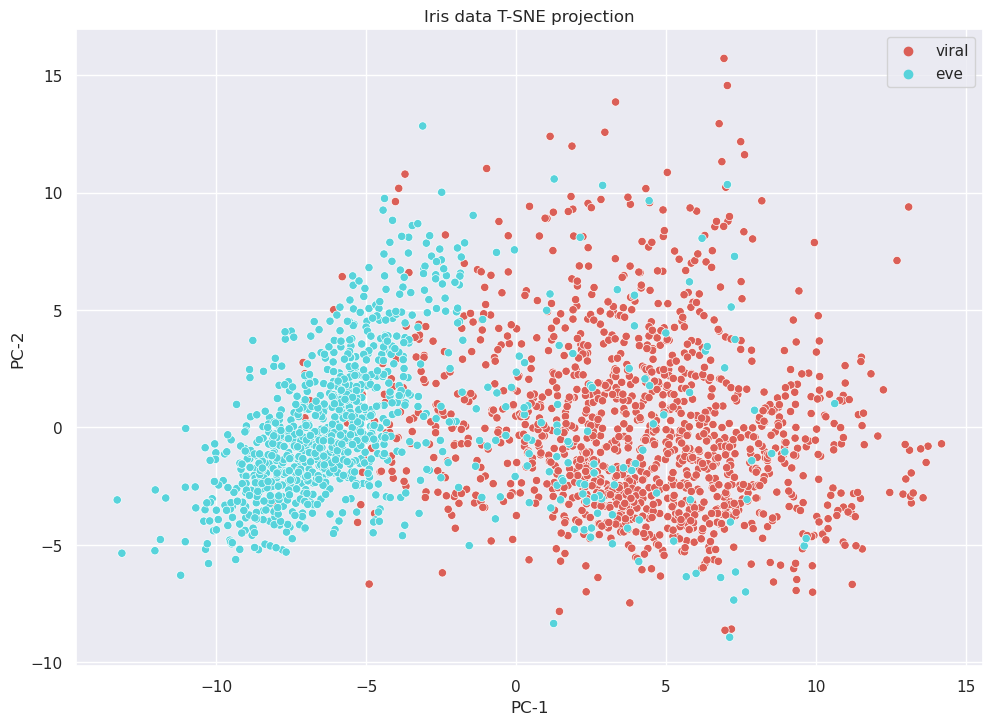

In [72]:
''' 
    REVIEW: 2023-06-11 - Seems like the title of this graph is wrong (should be 'PCA')
''' 

#Plotando os dados com as duas Principais componentes
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x="PC-1", y="PC-2", hue=aux1.y.tolist(),
                palette=sns.color_palette("hls",2),
                data=aux1).set(title="Iris data T-SNE projection") 

In [ ]:
# COnferindo a porcentagem da variância explicada pelas [PC1,PC2, PC3]
print(100*pca.explained_variance_ratio_)

[54.26340341 18.01306287  7.42823848]


Assim como no t-SNE, podemos notar uma certa definição de duas "nuvens de dados" representando as duas classes de interesse nesse trabalho e com uma relevante porcentagem da variância explicada pela PC1 (~54%)

#### 2.3 Hierarchical Clustering

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [74]:
# Computando as distâncias 
Z = linkage(X, method= 'ward', metric= 'euclidean')  #Método e métricas definidos arbitrariamente de acordo com minha experiência com esse tipo de dados de RNA-seq

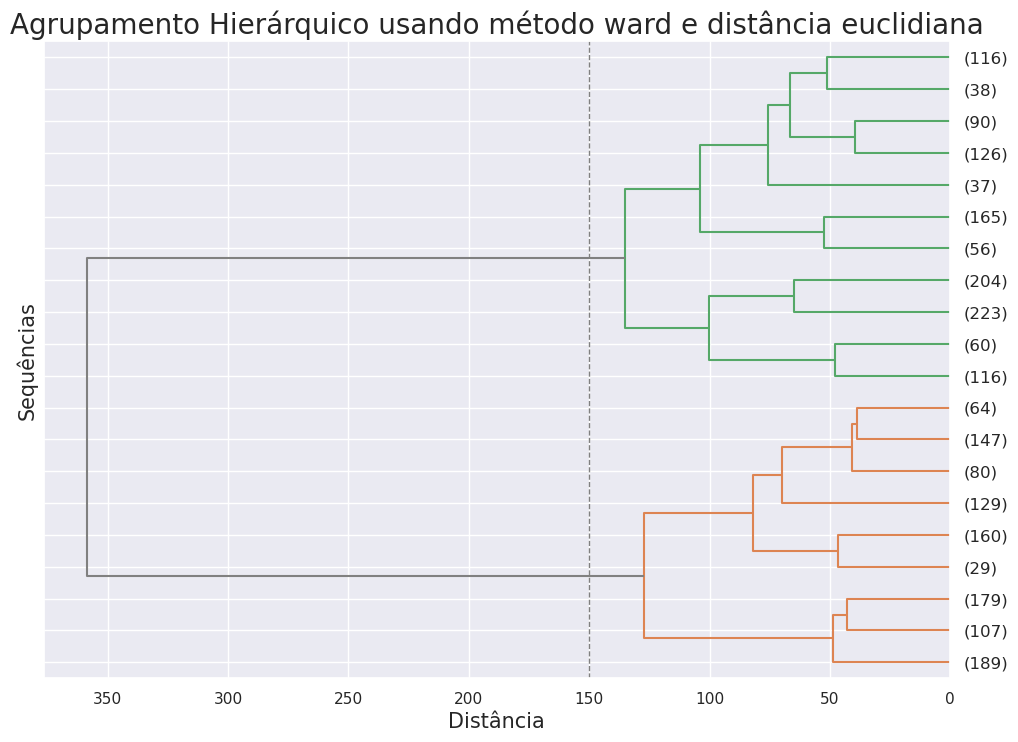

In [75]:
#Contruindo o dendograma 
dendrogram(Z, labels=y, leaf_rotation=0, orientation="left", color_threshold=150,above_threshold_color='grey', truncate_mode = 'lastp', p=20)
plt.axvline(x=150 , c='grey', lw=1, linestyle='dashed')
plt.title('Agrupamento Hierárquico usando método ward e distância euclidiana', fontdict={'fontsize': 20})
plt.xlabel('Distância', fontdict={'fontsize': 15})
plt.ylabel('Sequências', fontdict={'fontsize': 15})
plt.show()

Acima gerei uma visualização colapsada dos clusters gerados apenas para ter uma percepção geral do resultado. Podemos notar uma definição de 2 grandes grupos.

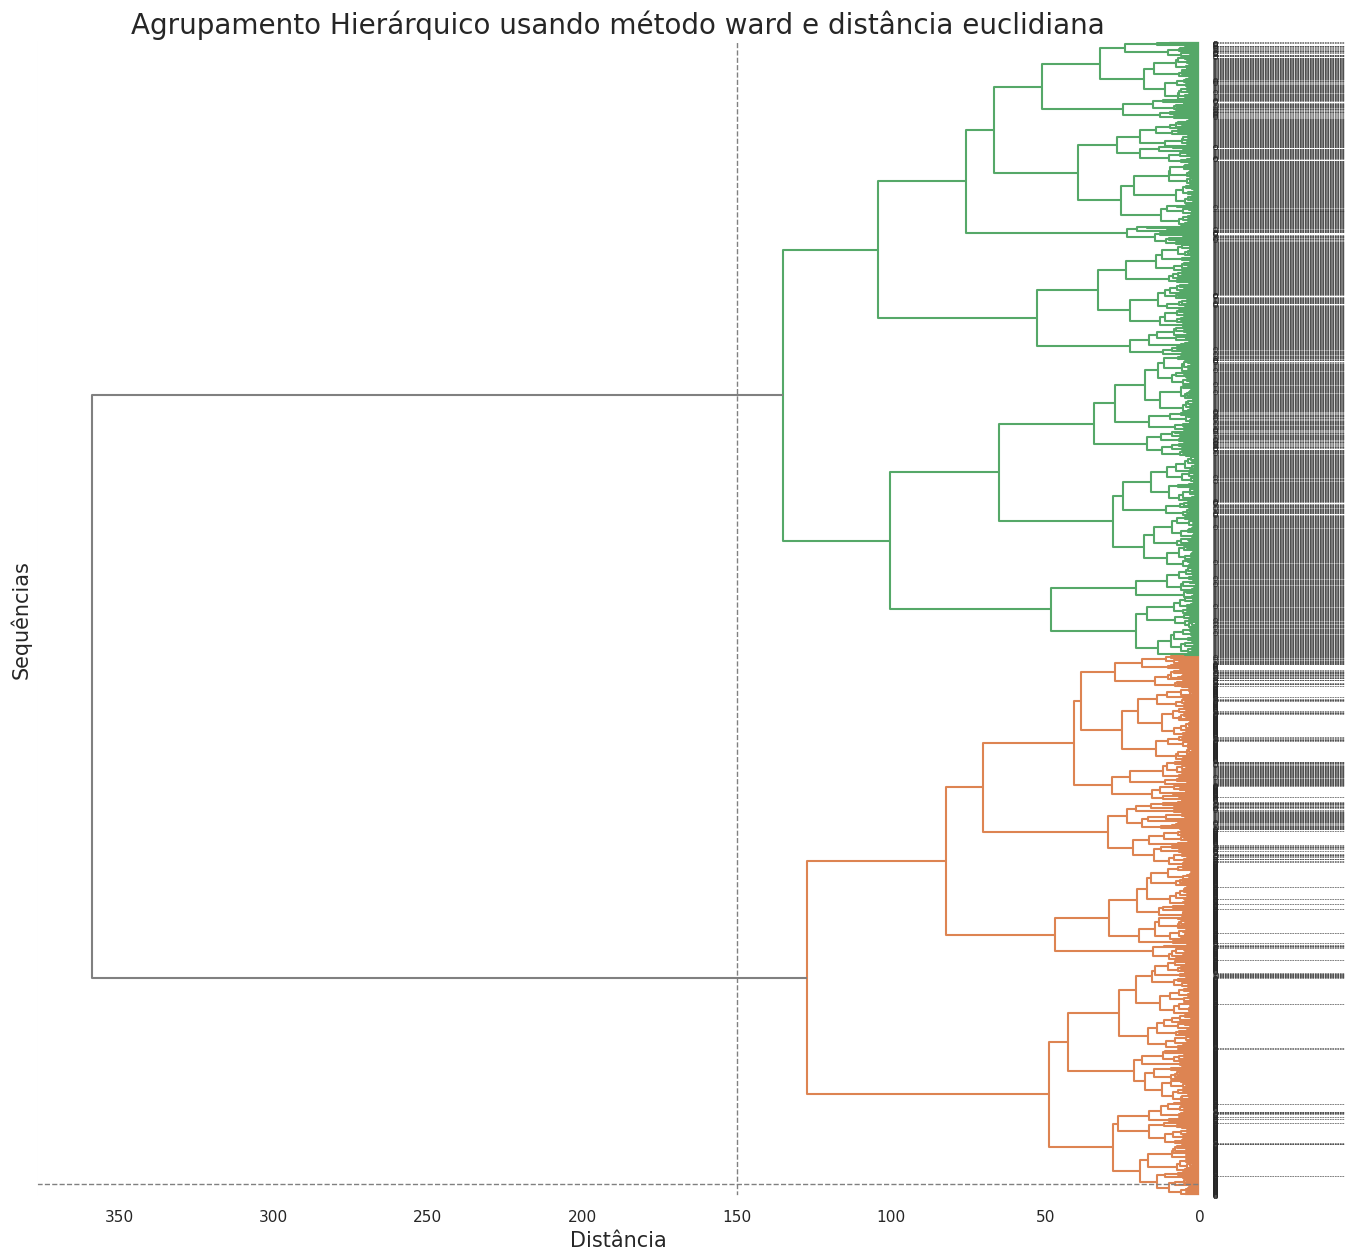

In [81]:
#Nao consegui achar uma forma de colorir os labels, por isso vou improvisar a vizualização a baixo, onde o label com um tracejado longo representa as sequencias vitais na figura
y_gamblabels = y.replace(['viral','eve'],['-----------------------------------------------------','O'])

#Dendograma com visualizacao improvisada para conferir a organizacao das sequencias virais e eves nos clusters
plt.figure(figsize=(15,15)) 
dendrogram(Z, labels=y_gamblabels, leaf_rotation=0, orientation="left", color_threshold=150, above_threshold_color='grey')
plt.axvline(x=150 , c='grey', lw=1, linestyle='dashed')
plt.title('Agrupamento Hierárquico usando método ward e distância euclidiana', fontdict={'fontsize': 20})
plt.axhline(y=240, c='grey', lw=1, linestyle='dashed')
plt.xlabel('Distância', fontdict={'fontsize': 15})
plt.ylabel('Sequências', fontdict={'fontsize': 15})
plt.show()

####################

Podemos notar que o grande agrupamento suérior é composto, em sua absoluta maioria, por sequências da classe "viral". Temos uma clusterização hieráquica consistente com a hipótese de que os atributos usadas nesse trabalho podem separa virus de eves.

#### 2.4 Agglomerative Clustering

In [76]:
from sklearn.cluster import AgglomerativeClustering

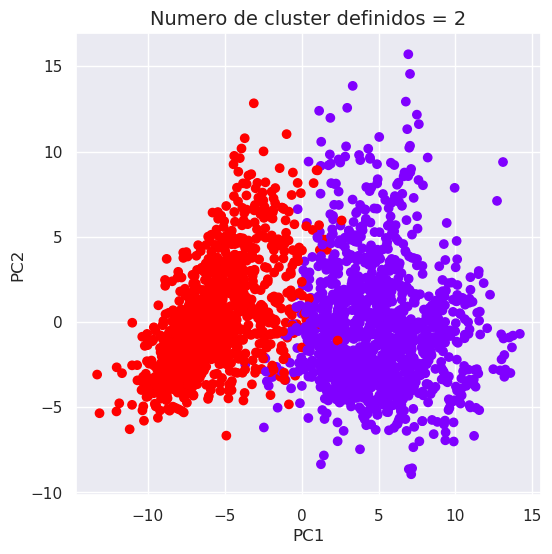

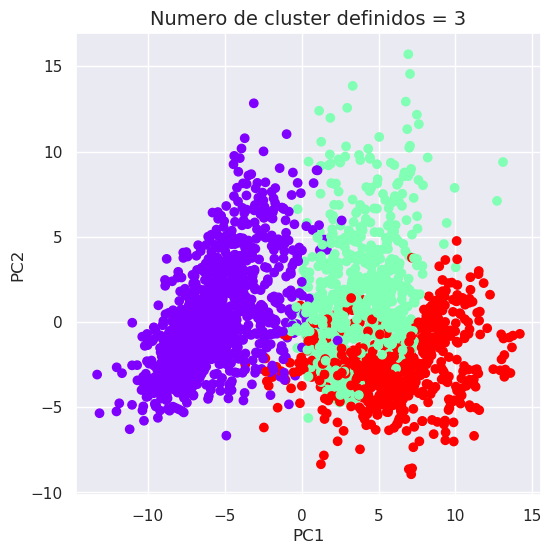

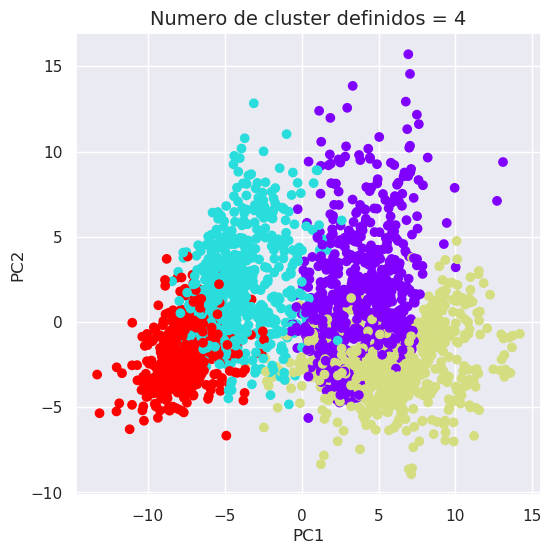

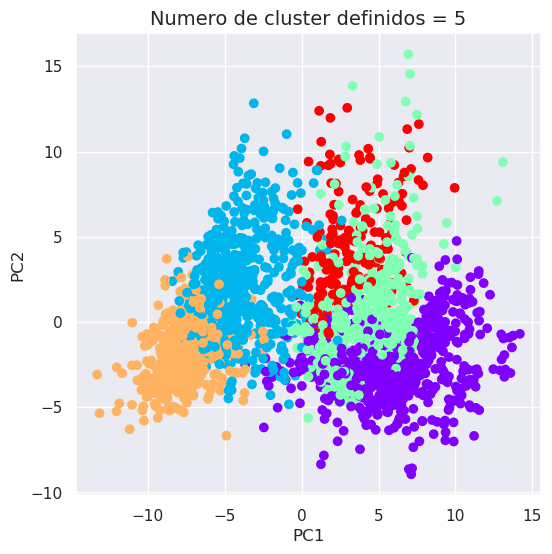

In [83]:
#Aqui estou empregando uma outra clusterização visualização de potenciais agrupamentos utilizando um algoritmo aglomerativo
# aqui a definição de clusters é arbitraria e testarei algumas variações
#Para possibilitar a visuzalição em 2d dos clusters determinados, estou usando as PC-1 e 2 computados na PCA realizada anteriormente

#Nesse loop vou criar os modelos e computar a clusterização considerando diferentes numeros de clusters e plotar a inferência dos clusters no resultado da PCA (PCs 1 e 2) 
for i in list(range(2,6)):
    ac = locals()["x" + str(i)] = AgglomerativeClustering(n_clusters = i, linkage="ward")
    # Visualizing the clustering
    plt.figure(figsize =(6, 6))
    # plt.scatter(X_pca[:,0], X_pca[:,1],c = ac.fit_predict(x), cmap ='rainbow')
    plt.scatter(X_pca[:,0], X_pca[:,1],c = ac.fit_predict(X), cmap ='rainbow')
    plt.title('Numero de cluster definidos = %i' %i, fontdict={'fontsize': 14})
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()



Para uma inferência do melhor número de clusters utilizando algum critério matemático avaliarei os "*Silhouette Scores*". Quanto mais próximo de **1**, melhor efinidos são os cluters.

In [77]:
from sklearn.metrics import silhouette_score

In [84]:
k = [2, 3, 4, 5] # arrumando para o plot

#Calculando o "silhouette score" para os modelos aglomerativos criados com diferentes numeros de clusters que gerei anteriormente
silhouette_scores = []
silhouette_scores.append(
        # silhouette_score(x, x2.fit_predict(x)))
        silhouette_score(X, x2.fit_predict(X)))
silhouette_scores.append(
        # silhouette_score(x, x3.fit_predict(x)))
        silhouette_score(X, x3.fit_predict(X)))
silhouette_scores.append(
        # silhouette_score(x, x4.fit_predict(x)))
        silhouette_score(X, x4.fit_predict(X)))
silhouette_scores.append(
        # silhouette_score(x, x5.fit_predict(x)))
        silhouette_score(X, x5.fit_predict(X)))

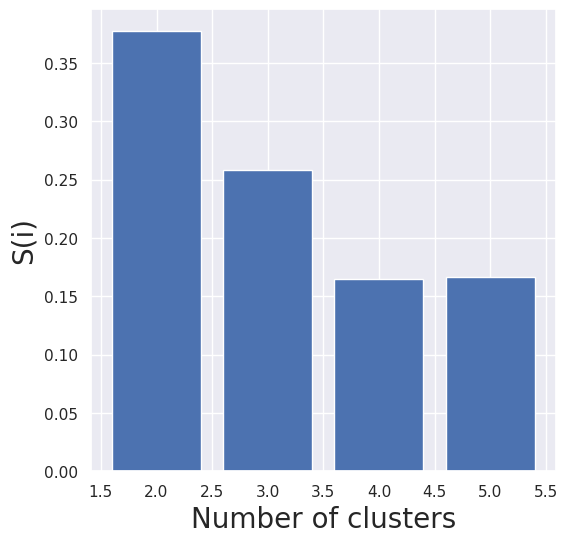

In [85]:
# Plotando grafico de barras para comprar os resultados dos "silhouette scores"
plt.figure(figsize =(6, 6))
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

COnsiderando os "Silhouette Scores",  o número de clusters = 2 é o que gerou os clusters melhores definidos. Consistente com a hipótese de que as features usadas para descrever sequências virais nesse trabalho separão bem virus de eves.  

#### 2.5 *K-Means* 

In [89]:
!pip install kneed

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


Avaliarei a "SSE curve" (sum of the squared Euclidean distances) com a finalidade de escoher o melhor valor de k. 
O que buscamos aqui é o "cotovelo de uma curva", onde há um ótimo "trade-off" do número de k e do score avaliado. Porém essa tarefa pode ser subjetiva. Podeos tentar inferir esse ponto ótimo ""
Podemos usar funções prontas que ajudam na inspeção da curva e decisão do melhor k.


In [92]:
!pip install yellowbrick

from yellowbrick.cluster import KElbowVisualizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 4.3 MB/s eta 0:00:00a 0:00:01


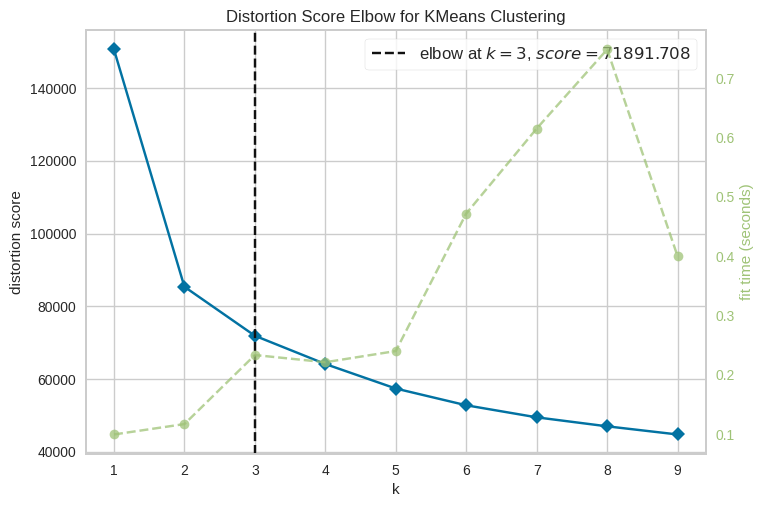

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
kmeans_kwargs = {
        "init": "k-means++", #inicializacao nao aletoria dos centroides com k-means++
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,}


model = KMeans(**kmeans_kwargs)
visualizer = KElbowVisualizer(model, k=(1,10)).fit(X) #avaliando k de 1 a 10
visualizer.show()

Apenas para conferir, vou verificar a inferência do valor ótimo de k considerando o dado X reduzido para 3 componentes principais (X_pca)

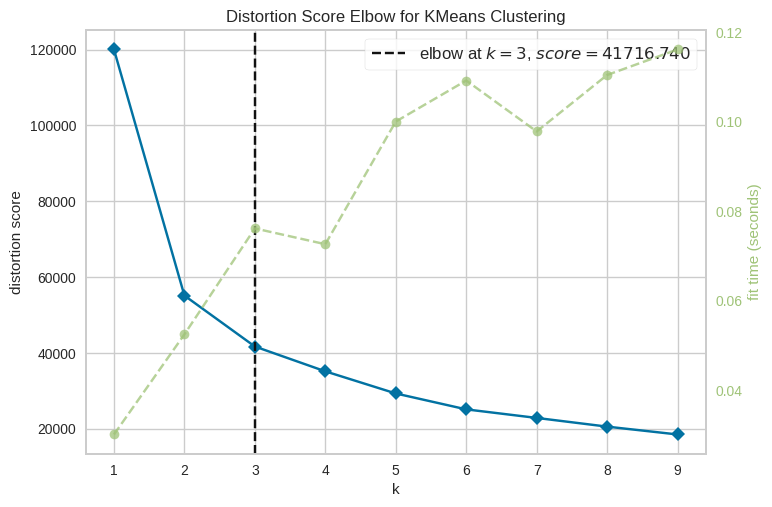

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
kmeans_kwargs = {
        "init": "k-means++",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,}


model = KMeans(**kmeans_kwargs)
visualizer = KElbowVisualizer(model, k=(1,10)).fit(X_pca)
visualizer.show()

O valor de k inferido para ambas respresentações dos dados, foi 3. Agora vou visualizar os clusters definidos com k=3 nas representação da PCA em 2d

In [95]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs).fit(X) # computando kmeans novamente agora que tenho meu k "ótimo" inferido

Contando quantas observações foram classificadas em cada um dos 3 clusters

In [96]:
#Get each cluster size,
from collections import Counter
Counter(kmeans.labels_)


Counter({0: 868, 2: 489, 1: 958})

Visualizando os clusters

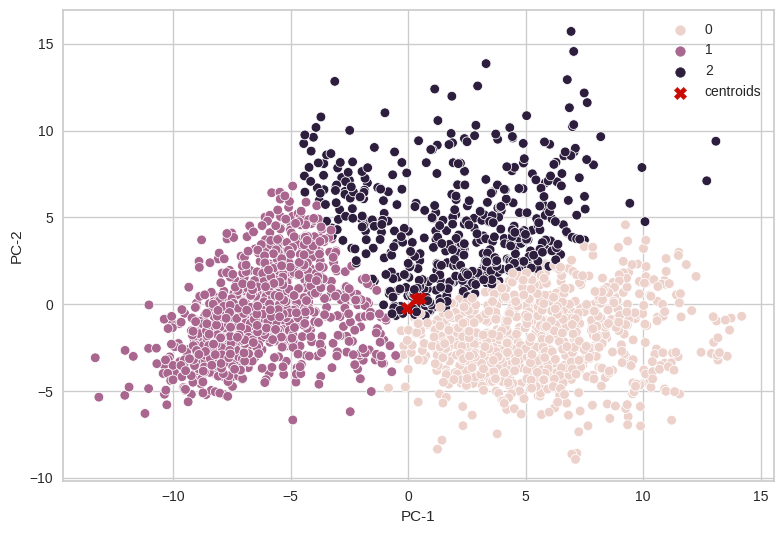

In [97]:
sns.scatterplot(data=aux1, x="PC-1", y="PC-2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()


A aplicação do k-Means sugere a exitência de três grupos nos meus dados. Porém, nitidamente, não parece uma divisão de clusters nitida, mesmo com o k ótimo, os pontos estão bastante próximos. A possibilidade de 3 grupos nesses dados é algo que explorarei no futuro.

### 3- Experimentos com modelos de aprendizado supervisionado

Para as variações de hiperparâmetros, avaliação dos métodos com k-fold (k=5) e calculo de acúracia automático dos modelos avaliados para cada método utilizarei o método "*GridSearchCV()*" .

*   Hiperparâmetros modificados foram armazenados em 'param_grid';
*   k-fold (k=5) estabelecido com o parametro "cv=5";
*   Calculo e avaliação de acurácia instânteneo de todos modelos determinado por "scoring='accuracy'".






#### 3.1- *Naive Bayes*



Importando biblioteca para aplicação do modelo: 

In [98]:
from sklearn.naive_bayes import GaussianNB

Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [99]:
param_grid = {'clf__var_smoothing': np.logspace(0,-9,num=100)}

NB_model = Pipeline( steps=[("clf", GaussianNB())])

NB_grid = GridSearchCV(
    estimator=NB_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)


Treinando o modelo:

In [100]:
NB_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', GaussianNB())]),
             param_grid={'clf__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='accuracy')

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [101]:
NB_grid_table = pd.DataFrame(NB_grid.cv_results_)
NB_grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005820,0.000697,0.003289,0.000099,1.0,{'clf__var_smoothing': 1.0},0.873457,0.861111,0.92284,0.876543,...,0.887037,0.022136,68,0.889660,0.893519,0.877315,0.888889,0.883488,0.886574,0.005628
1,0.005429,0.000016,0.003241,0.000013,0.811131,{'clf__var_smoothing': 0.8111308307896871},0.873457,0.861111,0.92284,0.879630,...,0.887654,0.021877,67,0.889660,0.892747,0.875772,0.888889,0.882716,0.885957,0.006044
2,0.005428,0.000026,0.003240,0.000011,0.657933,{'clf__var_smoothing': 0.657933224657568},0.873457,0.861111,0.92284,0.873457,...,0.885185,0.021772,70,0.888117,0.891204,0.874228,0.888117,0.881944,0.884722,0.006048
3,0.005404,0.000020,0.003225,0.000008,0.53367,{'clf__var_smoothing': 0.533669923120631},0.873457,0.858025,0.92284,0.873457,...,0.884568,0.022478,72,0.887346,0.890432,0.874228,0.886574,0.881944,0.884105,0.005636
4,0.005541,0.000196,0.003249,0.000044,0.432876,{'clf__var_smoothing': 0.43287612810830584},0.873457,0.858025,0.92284,0.873457,...,0.884568,0.022478,72,0.887346,0.891204,0.875000,0.886574,0.881944,0.884414,0.005551


Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [102]:
print("The best value of smoothing = {} with {} of accuracy.".format(NB_grid.best_params_,NB_grid.best_score_))

The best value of smoothing = {'clf__var_smoothing': 3.511191734215127e-05} with 0.8938271604938273 of accuracy.


Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [ ]:
NB_grid_predictions = NB_grid.predict(X_test) #Predição da classe (y) dos dados de teste com o melhor modelo selecionado
 
print(classification_report(y_test, NB_grid_predictions))# Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.86      0.85      0.86       298
       viral       0.89      0.90      0.89       397

    accuracy                           0.88       695
   macro avg       0.88      0.87      0.88       695
weighted avg       0.88      0.88      0.88       695



#### 3.2 - Decision Tree

Importando biblioteca para aplicação do modelo:

In [103]:
from sklearn import tree

Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [105]:
param_grid = {
    'clf__max_depth': np.arange(start=3, stop=100, step=3)} 

DT_model = Pipeline(
    steps=[
        
        ("clf", tree.DecisionTreeClassifier())
    ]
)

DT_grid = GridSearchCV(
    estimator=DT_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)



Treinando o modelo:

In [106]:
DT_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', DecisionTreeClassifier())]),
             param_grid={'clf__max_depth': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])},
             return_train_score=True, scoring='accuracy')

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [ ]:
DT_grid_table = pd.DataFrame(DT_grid.cv_results_)
DT_grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.052466,0.011766,0.010629,0.004698,3,{'clf__max_depth': 3},0.907407,0.907407,0.907407,0.898148,...,0.907407,0.005856,1,0.934414,0.933642,0.934414,0.922068,0.924383,0.929784,0.005412
1,0.074068,0.007012,0.004484,0.000053,6,{'clf__max_depth': 6},0.910494,0.885802,0.907407,0.898148,...,0.904321,0.011548,2,0.969136,0.970679,0.963735,0.959105,0.972222,0.966975,0.004865
2,0.112495,0.017346,0.007982,0.006046,9,{'clf__max_depth': 9},0.895062,0.891975,0.919753,0.888889,...,0.901852,0.012407,3,0.989198,0.982253,0.983796,0.980710,0.991512,0.985494,0.004152
3,0.126487,0.027167,0.007947,0.004909,12,{'clf__max_depth': 12},0.879630,0.873457,0.907407,0.870370,...,0.886420,0.015045,29,0.997685,0.993056,0.993056,0.991512,1.000000,0.995062,0.003222
4,0.151382,0.034842,0.008646,0.004046,15,{'clf__max_depth': 15},0.888889,0.879630,0.891975,0.885802,...,0.891358,0.010403,12,1.000000,0.996914,1.000000,0.993056,1.000000,0.997994,0.002743


Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [107]:
print("The best value of  {}  with {} of accuracy.".format(DT_grid.best_params_,DT_grid.best_score_))

The best value of  {'clf__max_depth': 3}  with 0.9080246913580247 of accuracy.


Plotando curva com os valores de erros estimado
(1- media da acuracia) no conjunto de treino e de teste da validação cruzada.

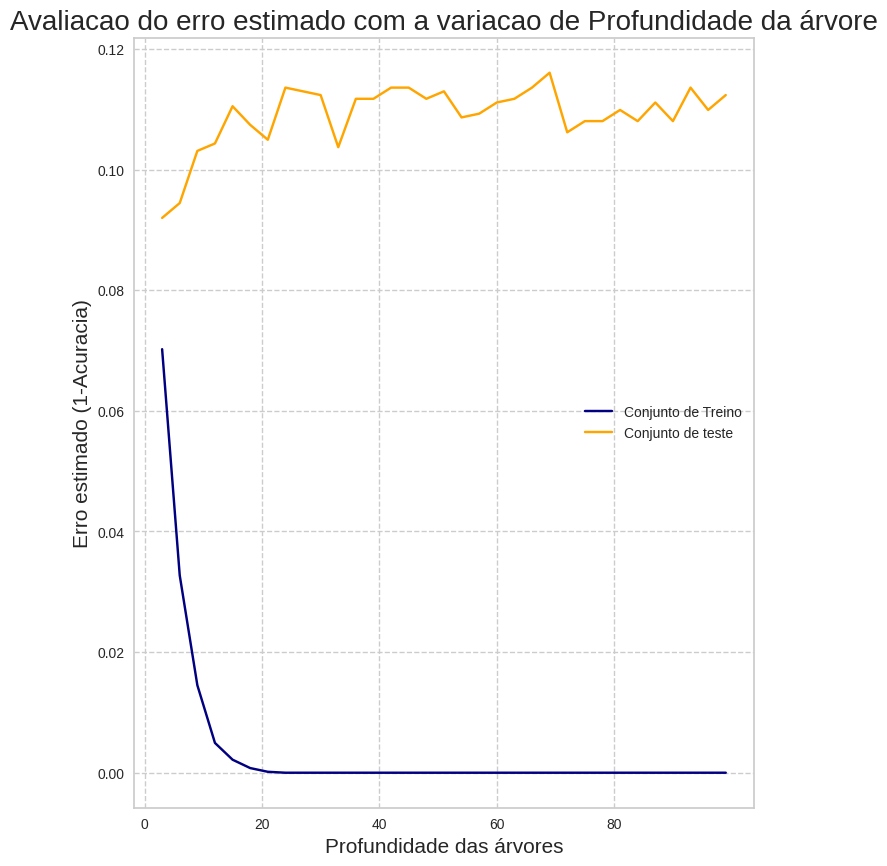

In [108]:
plt.figure(figsize=(8,10))
plt.plot(DT_grid.cv_results_['param_clf__max_depth'],1-DT_grid.cv_results_['mean_train_score'],
         color='navy', label="Conjunto de Treino")
plt.plot(DT_grid.cv_results_['param_clf__max_depth'],1-DT_grid.cv_results_['mean_test_score'],
         color='orange',label="Conjunto de teste")
plt.xlabel('Profundidade das árvores', fontdict={'fontsize': 15})
plt.ylabel('Erro estimado (1-Acuracia)', fontdict={'fontsize': 15})
plt.title('Avaliacao do erro estimado com a variacao de Profundidade da árvore', fontdict={'fontsize': 20})
plt.xticks(range(0,100,20),)
plt.legend(loc='best')
plt.grid(linestyle="--")
plt.show()

Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [109]:
DT_grid_predictions = DT_grid.predict(X_test)#Predição da classe (y) dos dados de teste com o melhor modelo selecionado
 
print(classification_report(y_test, DT_grid_predictions))#Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.95      0.85      0.90       298
       viral       0.89      0.96      0.93       397

    accuracy                           0.92       695
   macro avg       0.92      0.91      0.91       695
weighted avg       0.92      0.92      0.91       695



Visualização geral do modelo com a profundidade que resultou na melhor acurácia 

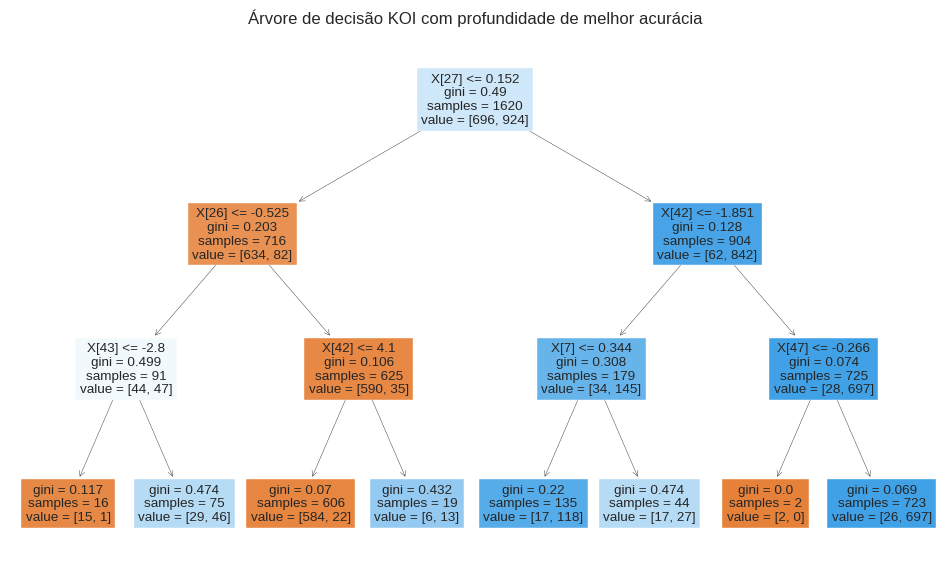

In [114]:
# plt.figure(figsize=(18,18))
plt.figure(figsize=(12,7))
tree.plot_tree(DT_grid.best_estimator_["clf"], filled=True)
plt.title("Árvore de decisão KOI com profundidade de melhor acurácia")
plt.show()

In [115]:
X.columns[47]

'dens18to35'

Inspecionando qual foi o atributo que iniciou a árvore com melhor acurácia 

In [ ]:
X.columns[27]

'X.21'

Muito interessante, foi a quantidade de RNAs de 21 nucleotídeos da fita antisense, uma molécula de relevância bioquimica para a infecção viral. Como de se esperar de um modelo simples como uma árvore de decisão, a interpretabilidade foi alta.

#### 3.3- *Support Vector Machines*

Importando biblioteca para aplicação do modelo:

In [116]:
from sklearn.svm import SVC

Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [117]:
# defining parameter range
param_grid = {'clf__kernel': ["poly","linear","rbf","sigmoid"],
              'clf__degree' : [2,3,4,5,6]}



SVM_model = Pipeline(
    steps=[
       
        ("clf", SVC())
    ]
)

SVM_grid = GridSearchCV(
    estimator=SVM_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy')


Treinando o modelo:

In [118]:
SVM_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', SVC())]),
             param_grid={'clf__degree': [2, 3, 4, 5, 6],
                         'clf__kernel': ['poly', 'linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [119]:
SVM_grid_table = pd.DataFrame(SVM_grid.cv_results_)
SVM_grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__degree,param_clf__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052712,0.002845,0.010199,0.000294,2,poly,"{'clf__degree': 2, 'clf__kernel': 'poly'}",0.910494,0.895062,0.925926,0.910494,0.925926,0.913580,0.011548,14
1,0.171439,0.017640,0.008778,0.000655,2,linear,"{'clf__degree': 2, 'clf__kernel': 'linear'}",0.901235,0.907407,0.916667,0.919753,0.925926,0.914198,0.008817,9
2,0.059037,0.001093,0.017677,0.000336,2,rbf,"{'clf__degree': 2, 'clf__kernel': 'rbf'}",0.910494,0.895062,0.929012,0.916667,0.935185,0.917284,0.014130,2
3,0.076002,0.003324,0.015805,0.000424,2,sigmoid,"{'clf__degree': 2, 'clf__kernel': 'sigmoid'}",0.796296,0.839506,0.848765,0.805556,0.839506,0.825926,0.020897,16
4,0.057325,0.002001,0.010366,0.000120,3,poly,"{'clf__degree': 3, 'clf__kernel': 'poly'}",0.913580,0.895062,0.929012,0.910494,0.929012,0.915432,0.012741,7


Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [120]:
print("The best value of {} with {} of accuracy.".format(SVM_grid.best_params_,SVM_grid.best_score_))

The best value of {'clf__degree': 4, 'clf__kernel': 'poly'} with 0.9191358024691357 of accuracy.


Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [121]:
SVM_grid_predictions = SVM_grid.predict(X_test)#Predição da classe (y) dos dados de teste com o melhor modelo selecionado
 
print(classification_report(y_test, SVM_grid_predictions))# Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.95      0.84      0.89       298
       viral       0.89      0.97      0.93       397

    accuracy                           0.91       695
   macro avg       0.92      0.90      0.91       695
weighted avg       0.92      0.91      0.91       695



#### 3.4- *k-Nearest Neighbors*

Importando biblioteca para aplicação do modelo:

In [122]:
from sklearn.neighbors import KNeighborsClassifier

Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [123]:
param_grid = {'clf__n_neighbors' : np.arange(start=3, stop=100, step=3)}

kNN_model = Pipeline(
    steps=[
       
        ("clf", KNeighborsClassifier())
    ]
)

kNN_grid = GridSearchCV(
    estimator=kNN_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)


Treinando o modelo:

In [124]:
kNN_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99])},
             return_train_score=True, scoring='accuracy')

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [125]:
grid_table = pd.DataFrame(kNN_grid.cv_results_)
grid_table.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006910,0.000898,0.029886,0.002517,3,{'clf__n_neighbors': 3},0.904321,0.895062,0.938272,0.910494,...,0.916667,0.017129,1,0.949074,0.949074,0.942901,0.940586,0.941358,0.944599,0.003729
1,0.006220,0.000093,0.035875,0.014161,6,{'clf__n_neighbors': 6},0.891975,0.895062,0.932099,0.916667,...,0.913580,0.017350,5,0.939043,0.937500,0.924383,0.923611,0.928241,0.930556,0.006511
2,0.006207,0.000113,0.032085,0.003789,9,{'clf__n_neighbors': 9},0.910494,0.888889,0.935185,0.907407,...,0.915432,0.017741,2,0.931327,0.932870,0.923611,0.923611,0.925926,0.927469,0.003904
3,0.006552,0.000631,0.029013,0.000303,12,{'clf__n_neighbors': 12},0.910494,0.895062,0.935185,0.907407,...,0.914198,0.013720,3,0.929012,0.927469,0.915895,0.918210,0.921296,0.922377,0.005109
4,0.006266,0.000039,0.029132,0.000184,15,{'clf__n_neighbors': 15},0.907407,0.891975,0.929012,0.910494,...,0.913580,0.014076,4,0.923611,0.927469,0.914352,0.915895,0.918981,0.920062,0.004870


Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [126]:
print("The best value of k = {} with {} of accuracy.".format(kNN_grid.best_params_,kNN_grid.best_score_))

The best value of k = {'clf__n_neighbors': 3} with 0.9166666666666666 of accuracy.


Plotando curva com os valores de erros estimado
(1- media da acuracia) no conjunto de treino e de teste da validação cruzada.

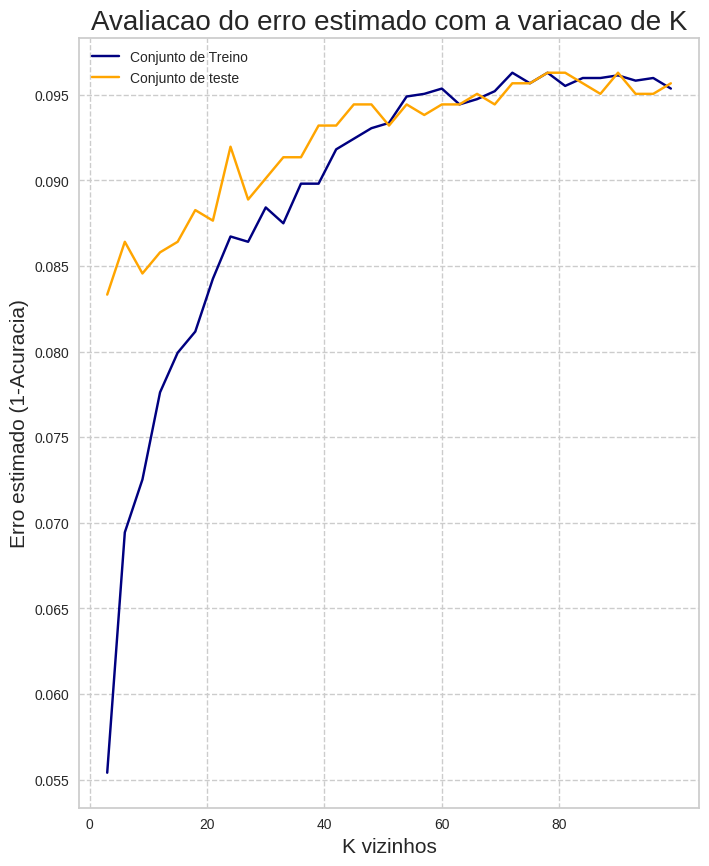

In [127]:
plt.figure(figsize=(8,10))
plt.plot(kNN_grid.cv_results_['param_clf__n_neighbors'],1-kNN_grid.cv_results_['mean_train_score'],
         color='navy', label="Conjunto de Treino")
plt.plot(kNN_grid.cv_results_['param_clf__n_neighbors'],1-kNN_grid.cv_results_['mean_test_score'],
         color='orange',label="Conjunto de teste")
plt.xlabel('K vizinhos', fontdict={'fontsize': 15})
plt.ylabel('Erro estimado (1-Acuracia)', fontdict={'fontsize': 15})
plt.title('Avaliacao do erro estimado com a variacao de K', fontdict={'fontsize': 20})
plt.xticks(range(0,100,20),)
plt.legend(loc='best')
plt.grid(linestyle="--")
plt.show()

Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [128]:
kNN_grid_predictions = kNN_grid.predict(X_test) #Predição da classe (y) dos dados de teste com o melhor modelo selecionado
 
print(classification_report(y_test, kNN_grid_predictions))# Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.94      0.87      0.90       298
       viral       0.91      0.96      0.93       397

    accuracy                           0.92       695
   macro avg       0.92      0.91      0.92       695
weighted avg       0.92      0.92      0.92       695



#### 3.5 - Ensemble models

Foi discutido nessa disciplina que o "estado da arte" do aprendizado supervisionado para lidar com problemas de classificação com dados estruturas são os modelos ensamble. No caso do meu problema, eles são ainda mais relevantes, por que eu tenho poucos dados, es estou em uma área perigosa de risco de "overfitting", o que pode ser até certo ponto, combatido com bagging (lida com erro de variância) e boosting (lida com erro de viés).

Em algum momento, eu poderia cogitar alguma abordam de NLP, já que tenho minhas sequências de RNAs montadas, porém, nas minhas estimativas mais otimistas de recursos financeiros e poder de mineiração de dados publicos que tenho até o final do doutorado, dificilmente conseguirei mais de 3 mil exemplos para cada uma de minhas classes eves e viral. Por isso, meu enfoque nos ensembles para meu problema.





##### 3.5.1 - Random Forest

Importando biblioteca para aplicação do modelo:

In [129]:
from sklearn.ensemble import RandomForestClassifier

Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [130]:
####
# 
param_grid = {'clf__n_estimators' : np.arange(start=50, stop=500, step=50)}

RF_model = Pipeline( steps=[
           ("clf", RandomForestClassifier())
    ]
)

RF_grid = GridSearchCV(
    estimator=RF_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)



Treinando o modelo:

In [131]:
RF_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', RandomForestClassifier())]),
             param_grid={'clf__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
             return_train_score=True, scoring='accuracy')

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [132]:
RF_grid_table = pd.DataFrame(RF_grid.cv_results_)
RF_grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.412379,0.009667,0.012557,0.000466,50,{'clf__n_estimators': 50},0.919753,0.913580,0.935185,0.919753,...,0.924074,0.008189,8,1.0,0.999228,1.000000,1.0,0.999228,0.999691,0.000378
1,0.826190,0.007478,0.022674,0.003027,100,{'clf__n_estimators': 100},0.929012,0.907407,0.929012,0.925926,...,0.923457,0.008143,9,1.0,1.000000,0.999228,1.0,1.000000,0.999846,0.000309
2,1.242617,0.020771,0.031238,0.002244,150,{'clf__n_estimators': 150},0.922840,0.910494,0.935185,0.941358,...,0.929012,0.011042,2,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.000000
3,1.628904,0.032546,0.038519,0.000380,200,{'clf__n_estimators': 200},0.932099,0.910494,0.932099,0.932099,...,0.927778,0.008642,6,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.000000
4,2.026355,0.013281,0.047601,0.000414,250,{'clf__n_estimators': 250},0.925926,0.922840,0.935185,0.941358,...,0.930247,0.006929,1,1.0,1.000000,1.000000,1.0,1.000000,1.000000,0.000000


Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [133]:
print("The best value of {} with {} of accuracy.".format(RF_grid.best_params_,RF_grid.best_score_))

The best value of {'clf__n_estimators': 250} with 0.9302469135802468 of accuracy.


Plotando curva com os valores de erros estimado
(1- media da acuracia) no conjunto de treino e de teste da validação cruzada.

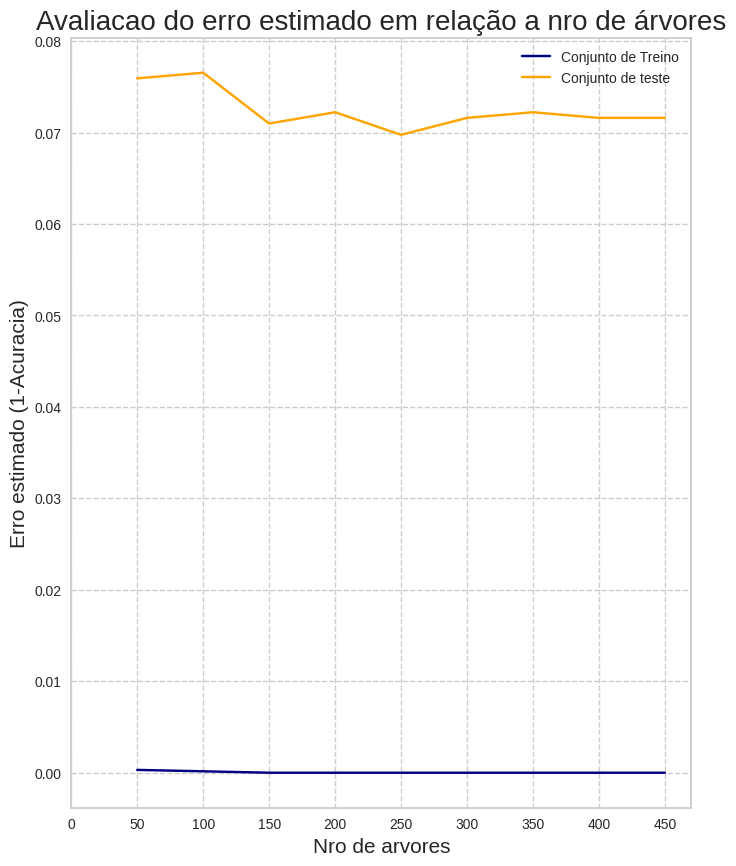

In [134]:
plt.figure(figsize=(8,10))
plt.plot(RF_grid.cv_results_['param_clf__n_estimators'],1-RF_grid.cv_results_['mean_train_score'],
         color='navy', label="Conjunto de Treino")
plt.plot(RF_grid.cv_results_['param_clf__n_estimators'],1-RF_grid.cv_results_['mean_test_score'],
         color='orange',label="Conjunto de teste")
plt.xlabel('Nro de arvores', fontdict={'fontsize': 15})
plt.ylabel('Erro estimado (1-Acuracia)', fontdict={'fontsize': 15})
plt.title('Avaliacao do erro estimado em relação a nro de árvores', fontdict={'fontsize': 20})
plt.xticks(range(0,500,50),)
plt.legend(loc='best')
plt.grid(linestyle="--")
plt.show()

Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [135]:
RF_grid_predictions = RF_grid.predict(X_test)#Predição da classe (y) dos dados de teste com o melhor modelo selecionado
  
print(classification_report(y_test, RF_grid_predictions))# Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.96      0.87      0.91       298
       viral       0.91      0.97      0.94       397

    accuracy                           0.93       695
   macro avg       0.93      0.92      0.93       695
weighted avg       0.93      0.93      0.93       695



##### 3.5.2- Adaptative Boosting






Importando biblioteca do "scikit-learn"

In [136]:
from sklearn.ensemble import AdaBoostClassifier

Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold (k=5) e computação da acurácia com GridSearchCV():

In [137]:
param_grid = {
    'clf__n_estimators': np.arange(start=50, stop=500, step=50)} 

AB_model = Pipeline(
    steps=[("clf", AdaBoostClassifier())])

AB_grid = GridSearchCV(
    estimator=AB_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)


Treinando o modelo

In [138]:
AB_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', AdaBoostClassifier())]),
             param_grid={'clf__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
             return_train_score=True, scoring='accuracy')

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [139]:
AB_grid_table = pd.DataFrame(AB_grid.cv_results_)
AB_grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.692500,0.001604,0.016472,0.000098,50,{'clf__n_estimators': 50},0.891975,0.876543,0.925926,0.925926,...,0.907407,0.019811,8,0.951389,0.952932,0.946759,0.946759,0.942130,0.947994,0.003830
1,1.387304,0.009125,0.029991,0.000085,100,{'clf__n_estimators': 100},0.895062,0.901235,0.916667,0.925926,...,0.912963,0.012711,3,0.978395,0.976852,0.972222,0.967593,0.971451,0.973302,0.003892
2,2.070362,0.001579,0.043364,0.000048,150,{'clf__n_estimators': 150},0.904321,0.898148,0.907407,0.925926,...,0.912346,0.011482,4,0.993827,0.993056,0.989198,0.989198,0.990741,0.991204,0.001927
3,2.756643,0.001276,0.056949,0.000418,200,{'clf__n_estimators': 200},0.898148,0.907407,0.916667,0.925926,...,0.915432,0.011482,1,0.999228,0.999228,0.999228,0.996914,0.998457,0.998611,0.000900
4,3.458039,0.013085,0.070098,0.000253,250,{'clf__n_estimators': 250},0.901235,0.898148,0.910494,0.932099,...,0.914815,0.014686,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [140]:
print("The best value of  {}  with {} of accuracy.".format(AB_grid.best_params_,AB_grid.best_score_))

The best value of  {'clf__n_estimators': 200}  with 0.9154320987654321 of accuracy.


Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

Plotando curva com os valores de erros estimado
(1- media da acuracia) no conjunto de treino e de teste da validação cruzada.

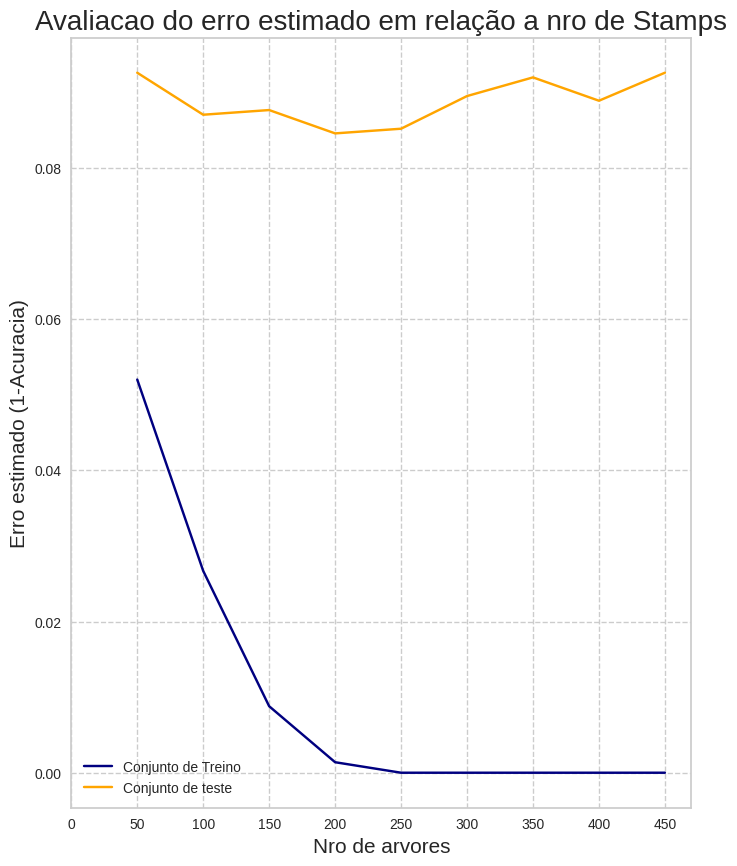

In [141]:
plt.figure(figsize=(8,10))
plt.plot(AB_grid.cv_results_['param_clf__n_estimators'],1-AB_grid.cv_results_['mean_train_score'],
         color='navy', label="Conjunto de Treino")
plt.plot(AB_grid.cv_results_['param_clf__n_estimators'],1-AB_grid.cv_results_['mean_test_score'],
         color='orange',label="Conjunto de teste")
plt.xlabel('Nro de arvores', fontdict={'fontsize': 15})
plt.ylabel('Erro estimado (1-Acuracia)', fontdict={'fontsize': 15})
plt.title('Avaliacao do erro estimado em relação a nro de Stamps', fontdict={'fontsize': 20})
plt.xticks(range(0,500,50),)
plt.legend(loc='best')
plt.grid(linestyle="--")
plt.show()

In [142]:
AB_grid_predictions = AB_grid.predict(X_test)#Predição da classe (y) dos dados de teste com o melhor modelo selecionado
print(classification_report(y_test, AB_grid_predictions))#Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.94      0.87      0.90       298
       viral       0.91      0.96      0.93       397

    accuracy                           0.92       695
   macro avg       0.92      0.91      0.92       695
weighted avg       0.92      0.92      0.92       695



#### 3.5.3 - Gradient Tree Boosting

Importando biblioteca para aplicação do modelo:

In [143]:
from sklearn.ensemble import GradientBoostingClassifier

Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [144]:
param_grid = {'clf__n_estimators' : np.arange(start=50, stop=500, step=50)}

GTB_model = Pipeline( steps=[
        ("clf", GradientBoostingClassifier())
    ]
)

GTB_grid = GridSearchCV(
    estimator=GTB_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)


Treinando o modelo

In [145]:
GTB_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf', GradientBoostingClassifier())]),
             param_grid={'clf__n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450])},
             return_train_score=True, scoring='accuracy')

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [146]:
grid_table = pd.DataFrame(GTB_grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.348850,0.009246,0.003805,0.000173,50,{'clf__n_estimators': 50},0.913580,0.904321,0.929012,0.922840,...,0.919753,0.009563,2,0.966821,0.969907,0.964506,0.965278,0.968364,0.966975,0.001976
1,2.732091,0.022448,0.004393,0.000597,100,{'clf__n_estimators': 100},0.901235,0.907407,0.925926,0.925926,...,0.919753,0.013524,1,0.981481,0.983025,0.975309,0.979938,0.984568,0.980864,0.003178
2,4.113448,0.019554,0.004595,0.000072,150,{'clf__n_estimators': 150},0.904321,0.901235,0.925926,0.910494,...,0.915432,0.013036,7,0.988426,0.992284,0.987654,0.988426,0.988426,0.989043,0.001648
3,5.488270,0.071688,0.005021,0.000318,200,{'clf__n_estimators': 200},0.916667,0.888889,0.925926,0.916667,...,0.916049,0.014789,6,0.997685,0.995370,0.996142,0.996142,0.994599,0.995988,0.001024
4,6.816126,0.036089,0.005585,0.000580,250,{'clf__n_estimators': 250},0.913580,0.891975,0.935185,0.910494,...,0.916667,0.015738,5,0.999228,1.000000,0.999228,1.000000,0.997685,0.999228,0.000845


Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [147]:
print("The best value of {} with {} of accuracy.".format(GTB_grid.best_params_,GTB_grid.best_score_))

The best value of {'clf__n_estimators': 100} with 0.9197530864197532 of accuracy.


Plotando curva com os valores de erros estimado (1- media da acuracia) no conjunto de treino e de teste da validação cruzada.

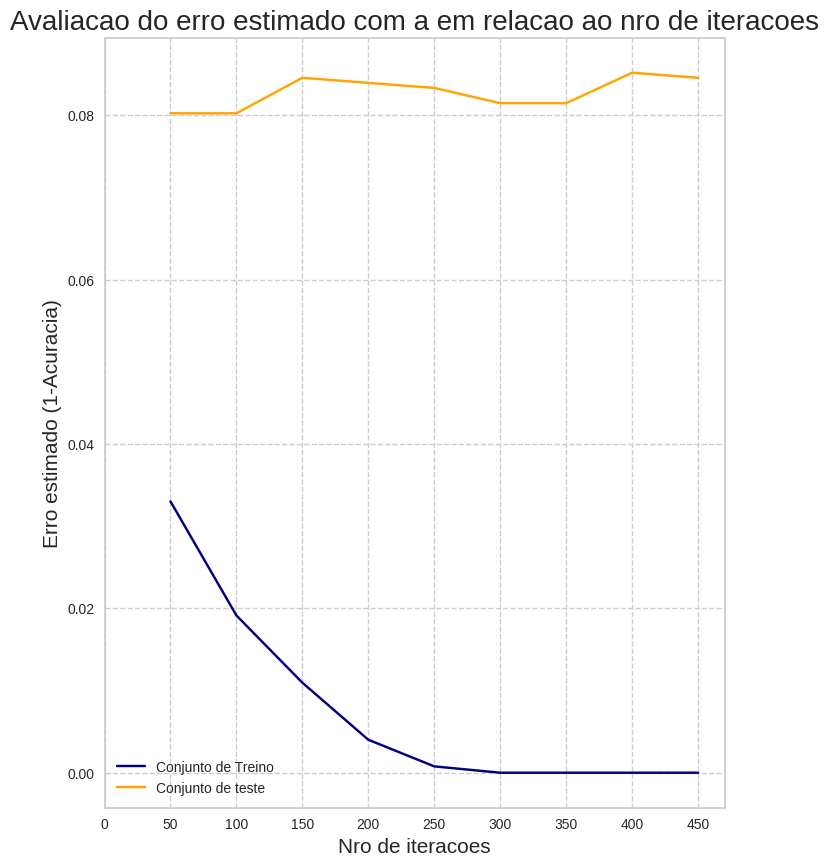

In [148]:
plt.figure(figsize=(8,10))
plt.plot(GTB_grid.cv_results_['param_clf__n_estimators'],1-GTB_grid.cv_results_['mean_train_score'],
         color='navy', label="Conjunto de Treino")
plt.plot(GTB_grid.cv_results_['param_clf__n_estimators'],1-GTB_grid.cv_results_['mean_test_score'],
         color='orange',label="Conjunto de teste")
plt.xlabel('Nro de iteracoes', fontdict={'fontsize': 15})
plt.ylabel('Erro estimado (1-Acuracia)', fontdict={'fontsize': 15})
plt.title('Avaliacao do erro estimado com a em relacao ao nro de iteracoes', fontdict={'fontsize': 20})
plt.xticks(range(0,500,50),)
plt.legend(loc='best')
plt.grid(linestyle="--")
plt.show()

Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [149]:
GTB_grid_predictions = GTB_grid.predict(X_test)#Predição da classe (y) dos dados de teste com o melhor modelo selecionado
 
print(classification_report(y_test, GTB_grid_predictions))#Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.94      0.89      0.92       298
       viral       0.92      0.96      0.94       397

    accuracy                           0.93       695
   macro avg       0.93      0.92      0.93       695
weighted avg       0.93      0.93      0.93       695



#### 3.5.4 Gradient Boosting with CatBoost

Importando biblioteca para aplicação do modelo:

In [153]:
!pip install catboost

from catboost import CatBoostClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 6.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 17.3 MB/s eta 0:00:00


Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [156]:
param_grid = {'clf__iterations' : np.arange(start=50, stop=500, step=50)}

CAT_model = Pipeline( steps=[
        ("clf", CatBoostClassifier())
    ]
)

CAT_grid = GridSearchCV(
    estimator=CAT_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)

Treinando o modelo

In [157]:
CAT_grid.fit(X_train, y_train)

ValueError: 
All the 45 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/opt/conda/lib/python3.10/site-packages/catboost/core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/opt/conda/lib/python3.10/site-packages/catboost/core.py", line 2357, in _fit
    self._train(
  File "/opt/conda/lib/python3.10/site-packages/catboost/core.py", line 1761, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
  File "_catboost.pyx", line 4624, in _catboost._CatBoost._train
  File "_catboost.pyx", line 4673, in _catboost._CatBoost._train
_catboost.CatBoostError: /src/catboost/catboost/libs/train_lib/dir_helper.cpp:20: Can't create train working dir: catboost_info


Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [ ]:
grid_table = pd.DataFrame(CAT_grid.cv_results_)
grid_table.head()

Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [ ]:
print("The best value of {} with {} of accuracy.".format(CAT_grid.best_params_,CAT_grid.best_score_))

The best value of {'clf__iterations': 450} with 0.9265432098765432 of accuracy.


Plotando curva com os valores de erros estimado (1- media da acuracia) no conjunto de treino e de teste da validação cruzada.

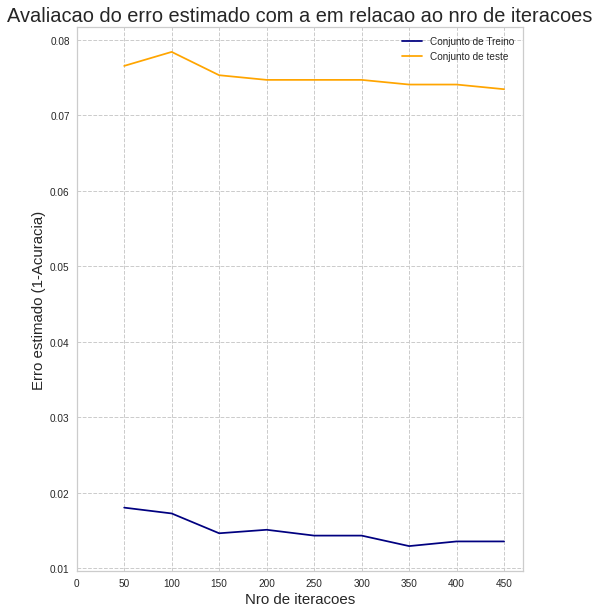

In [ ]:
plt.figure(figsize=(8,10))
plt.plot(CAT_grid.cv_results_['param_clf__iterations'],1-CAT_grid.cv_results_['mean_train_score'],
         color='navy', label="Conjunto de Treino")
plt.plot(CAT_grid.cv_results_['param_clf__iterations'],1-CAT_grid.cv_results_['mean_test_score'],
         color='orange',label="Conjunto de teste")
plt.xlabel('Nro de iteracoes', fontdict={'fontsize': 15})
plt.ylabel('Erro estimado (1-Acuracia)', fontdict={'fontsize': 15})
plt.title('Avaliacao do erro estimado com a em relacao ao nro de iteracoes', fontdict={'fontsize': 20})
plt.xticks(range(0,500,50),)
plt.legend(loc='best')
plt.grid(linestyle="--")
plt.show()

Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [ ]:
CAT_grid_predictions = CAT_grid.predict(X_test)#Predição da classe (y) dos dados de teste com o melhor modelo selecionado
 
print(classification_report(y_test, CAT_grid_predictions))#Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.96      0.87      0.91       298
       viral       0.91      0.97      0.94       397

    accuracy                           0.93       695
   macro avg       0.93      0.92      0.92       695
weighted avg       0.93      0.93      0.93       695



#### 3.5.5 Gradient Boosting with XGBoost

Importando biblioteca para aplicação do modelo:

In [159]:
!pip install xgboost

from xgboost import XGBClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 5.7 MB/s eta 0:00:0000:0100:01


Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [160]:
param_grid = {'clf__n_estimators' : np.arange(start=50, stop=500, step=50)}

XGB_model = Pipeline( steps=[
        ("clf", XGBClassifier())
    ]
)

XGB_grid = GridSearchCV(
    estimator=XGB_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)


Treinando o modelo

In [169]:
# # XGB_grid.fit(X_train, y_train)

# y_aux = np.zeros(y_train.shape)
# y_aux[:, 0] = y_train[:,0]
# y_aux[:, 1] = np.int(y_train[:,0] == 'viral')

# y_aux

# np.where(y_train[:,1] == 'viral')
y_train[:].shape

(1620,)

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [ ]:
grid_table = pd.DataFrame(XGB_grid.cv_results_)
grid_table.head()

Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [ ]:
print("The best value of {} with {} of accuracy.".format(XGB_grid.best_params_,XGB_grid.best_score_))

The best value of {'clf__n_estimators': 450} with 0.9253086419753087 of accuracy.


Plotando curva com os valores de erros estimado (1- media da acuracia) no conjunto de treino e de teste da validação cruzada.

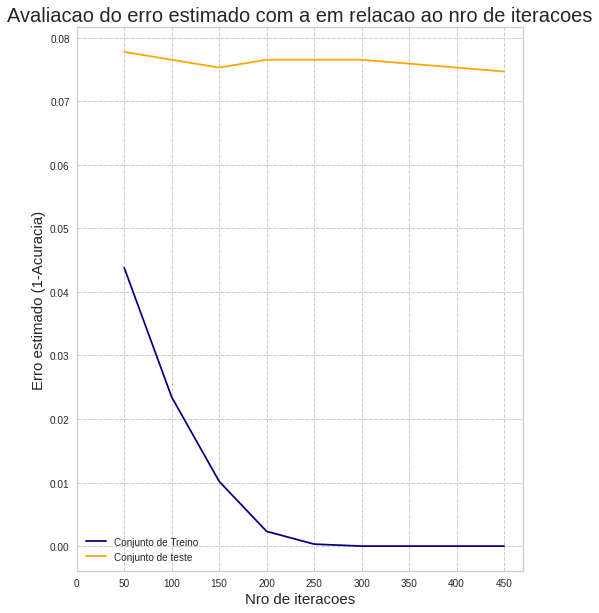

In [ ]:
plt.figure(figsize=(8,10))
plt.plot(XGB_grid.cv_results_['param_clf__n_estimators'],1-XGB_grid.cv_results_['mean_train_score'],
         color='navy', label="Conjunto de Treino")
plt.plot(XGB_grid.cv_results_['param_clf__n_estimators'],1-XGB_grid.cv_results_['mean_test_score'],
         color='orange',label="Conjunto de teste")
plt.xlabel('Nro de iteracoes', fontdict={'fontsize': 15})
plt.ylabel('Erro estimado (1-Acuracia)', fontdict={'fontsize': 15})
plt.title('Avaliacao do erro estimado com a em relacao ao nro de iteracoes', fontdict={'fontsize': 20})
plt.xticks(range(0,500,50),)
plt.legend(loc='best')
plt.grid(linestyle="--")
plt.show()

Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [ ]:
XGB_grid_predictions = XGB_grid.predict(X_test)#Predição da classe (y) dos dados de teste com o melhor modelo selecionado
 
print(classification_report(y_test, XGB_grid_predictions))#Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.95      0.88      0.91       298
       viral       0.92      0.96      0.94       397

    accuracy                           0.93       695
   macro avg       0.93      0.92      0.93       695
weighted avg       0.93      0.93      0.93       695



#### 3.5.6- Gradient Boosting with LightGBM

Importando biblioteca para aplicação do modelo:

In [171]:
!pip install lightgbm

from lightgbm import LGBMClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.5 MB/s eta 0:00:0000:0100:01


Estabelicmento dos hiperparâmetros a serem variados, validação cruzada com k-fold e computação da acurácia com *GridSearchCV()*:

In [172]:
param_grid = {'clf__n_estimators' : np.arange(start=50, stop=500, step=25)}

LGB_model = Pipeline( steps=[
        ("clf", LGBMClassifier())
    ]
)

LGB_grid = GridSearchCV(
    estimator=LGB_model, 
    param_grid=param_grid, 
    cv=5,
    scoring='accuracy',return_train_score=True)


Treinando o modelo

In [173]:
LGB_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('clf', LGBMClassifier())]),
             param_grid={'clf__n_estimators': array([ 50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350,
       375, 400, 425, 450, 475])},
             return_train_score=True, scoring='accuracy')

Inspecionando a tabela com a performance dos classificadores em relação aos hiperparametros variados:

In [174]:
grid_table = pd.DataFrame(LGB_grid.cv_results_)
grid_table.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.171302,0.103659,0.003869,0.000312,50,{'clf__n_estimators': 50},0.916667,0.907407,0.925926,0.922840,...,0.920370,0.007660,18,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.328158,0.191398,0.003907,0.000149,75,{'clf__n_estimators': 75},0.919753,0.907407,0.919753,0.935185,...,0.923457,0.010584,13,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.293235,0.140203,0.003963,0.000115,100,{'clf__n_estimators': 100},0.919753,0.907407,0.929012,0.935185,...,0.925926,0.011214,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,0.428828,0.304427,0.004089,0.000232,125,{'clf__n_estimators': 125},0.919753,0.907407,0.929012,0.935185,...,0.925926,0.011214,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.279083,0.012948,0.004090,0.000077,150,{'clf__n_estimators': 150},0.919753,0.907407,0.932099,0.935185,...,0.926543,0.011449,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Mostrando os melhores valores para os hiperparâmetros ajustados e a acúrácia resultante do modelo:

In [175]:
print("The best value of {} with {} of accuracy.".format(LGB_grid.best_params_,LGB_grid.best_score_))

The best value of {'clf__n_estimators': 150} with 0.9265432098765432 of accuracy.


Plotando curva com os valores de erros estimado (1- media da acuracia) no conjunto de treino e de teste da validação cruzada.

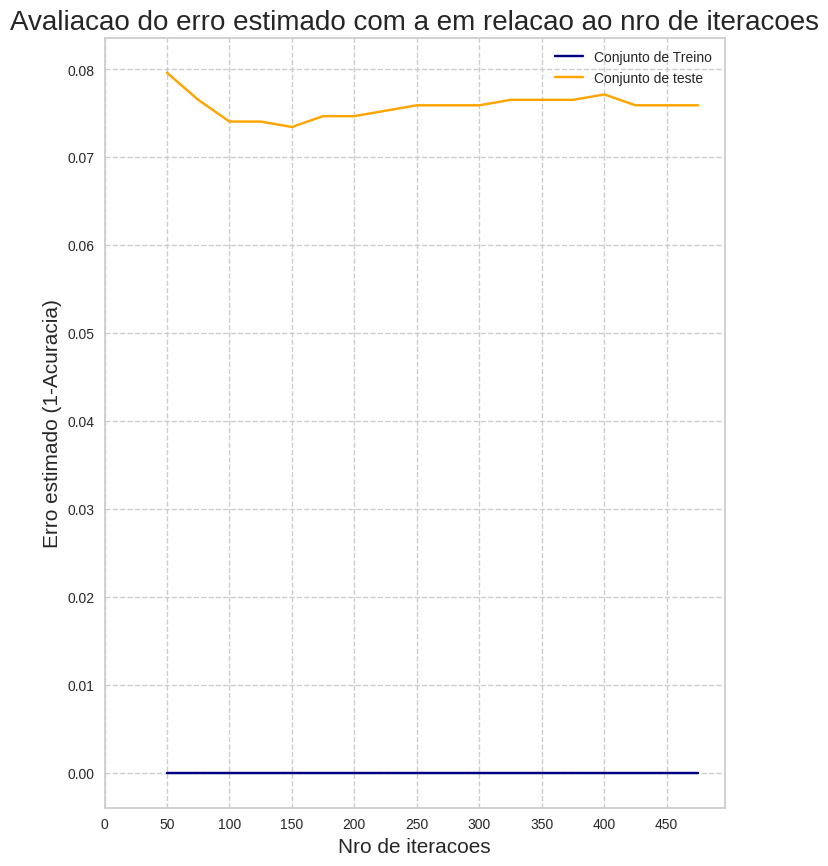

In [176]:
plt.figure(figsize=(8,10))
plt.plot(LGB_grid.cv_results_['param_clf__n_estimators'],1-LGB_grid.cv_results_['mean_train_score'],
         color='navy', label="Conjunto de Treino")
plt.plot(LGB_grid.cv_results_['param_clf__n_estimators'],1-LGB_grid.cv_results_['mean_test_score'],
         color='orange',label="Conjunto de teste")
plt.xlabel('Nro de iteracoes', fontdict={'fontsize': 15})
plt.ylabel('Erro estimado (1-Acuracia)', fontdict={'fontsize': 15})
plt.title('Avaliacao do erro estimado com a em relacao ao nro de iteracoes', fontdict={'fontsize': 20})
plt.xticks(range(0,500,50),)
plt.legend(loc='best')
plt.grid(linestyle="--")
plt.show()

Avaliando a performance do modelo com os melhores hiperparâmetros nos dados de teste (ainda não "vistos" pelo modelo):

In [177]:
LGB_grid_predictions = LGB_grid.predict(X_test)#Predição da classe (y) dos dados de teste com o melhor modelo selecionado
 
print(classification_report(y_test, LGB_grid_predictions))#Comparando a classe das istâncias do dado de teste com as predições do modelo e imprimindo resumo com métricas da performance 

              precision    recall  f1-score   support

         eve       0.95      0.88      0.91       298
       viral       0.91      0.97      0.94       397

    accuracy                           0.93       695
   macro avg       0.93      0.92      0.93       695
weighted avg       0.93      0.93      0.93       695



## 4 - Comparação dos métodos de classificação supervisionados

### 4.1 Curvas ROC e DET

In [180]:
classifiers = {
    'Naive Bayes' : NB_grid,
    'Decision Tree' : DT_grid,
    'SVM' : SVM_grid,
    'k-NN' : kNN_grid,
    'Rand. Forest' : RF_grid ,
    'G.T. Boost.': GTB_grid,
    'AdaBoost' :  AB_grid,
    # 'CATBoost' : CAT_grid,
    #  'XGBoost' : XGB_grid,
      'LightGBM': LGB_grid}

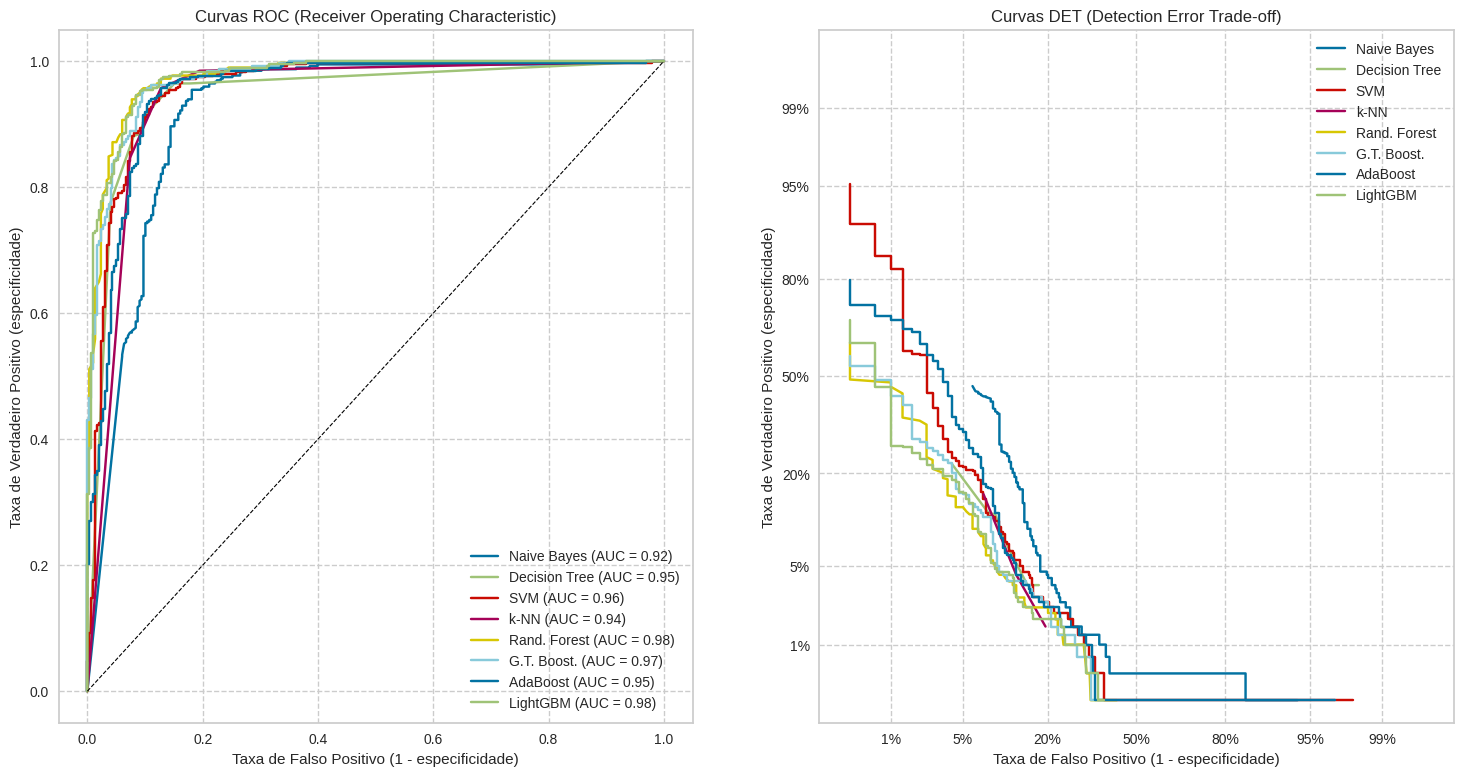

In [181]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(18, 9))

for name, clf in classifiers.items():
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)


ax_roc.set_title("Curvas ROC (Receiver Operating Characteristic)")
ax_roc.set_ylabel("Taxa de Verdadeiro Positivo (especificidade)")
ax_roc.set_xlabel("Taxa de Falso Positivo (1 - especificidade)")

ax_det.set_title("Curvas DET (Detection Error Trade-off)")
ax_det.set_ylabel("Taxa de Verdadeiro Positivo (especificidade)")
ax_det.set_xlabel("Taxa de Falso Positivo (1 - especificidade)")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

ax_roc.plot([0,1],[0,1], linestyle='--', color="black",linewidth=0.8)
plt.legend()
plt.show()

### 4.2 Precision e Recall

Importando biblioteca para plotar curvas Precision/recall

In [182]:
from sklearn.metrics import precision_recall_curve


In [183]:
y_test_binario = y_test.replace(['viral','eve'],[0,1]) # alteracao do label para plotar a curva

Estimando as probabilidades

In [184]:
NB_pred_prob = NB_grid.predict_proba(X_test)[:, 1]
NB_precision, NB_recall, thresholds = precision_recall_curve(y_test_binario,NB_pred_prob)

DT_pred_prob = DT_grid.predict_proba(X_test)[:, 1]
DT_precision, DT_recall, thresholds = precision_recall_curve(y_test_binario,DT_pred_prob)

kNN_pred_prob = kNN_grid.predict_proba(X_test)[:, 1]
kNN_precision, kNN_recall, thresholds = precision_recall_curve(y_test_binario,kNN_pred_prob)

RF_pred_prob = RF_grid.predict_proba(X_test)[:, 1]
RF_precision, RF_recall, thresholds = precision_recall_curve(y_test_binario,RF_pred_prob)

GTB_pred_prob = GTB_grid.predict_proba(X_test)[:, 1]
GTB_precision, GTB_recall, thresholds = precision_recall_curve(y_test_binario,GTB_pred_prob)

AB_pred_prob = AB_grid.predict_proba(X_test)[:, 1]
AB_precision, AB_recall, thresholds = precision_recall_curve(y_test_binario,AB_pred_prob)   

CAT_pred_prob = CAT_grid.predict_proba(X_test)[:, 1]
CAT_precision, CAT_recall, thresholds = precision_recall_curve(y_test_binario,CAT_pred_prob)   

XGB_pred_prob = XGB_grid.predict_proba(X_test)[:, 1]
XGB_precision, XGB_recall, thresholds = precision_recall_curve(y_test_binario,XGB_pred_prob) 

LGB_pred_prob = LGB_grid.predict_proba(X_test)[:, 1]
LGB_precision, LGB_recall, thresholds = precision_recall_curve(y_test_binario,LGB_pred_prob) 


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Plotando curvas Precision/Recall

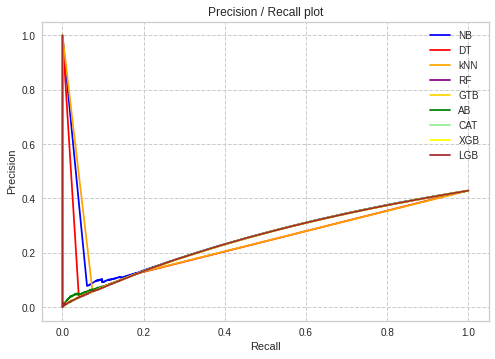

In [ ]:
plt.plot(NB_recall, NB_precision, label='NB',color="blue")
plt.plot(DT_recall, DT_precision,label='DT',color="red") 
plt.plot(kNN_recall, kNN_precision, label='kNN',color="orange" )
plt.plot(RF_recall, RF_precision, label='RF',color="purple" )
plt.plot(GTB_recall, GTB_precision, label='GTB',color="gold" )
plt.plot(AB_recall, AB_precision, label='AB',color="green" )
plt.plot(CAT_recall, CAT_precision, label='CAT',color="lightgreen" )
plt.plot(XGB_recall, XGB_precision, label='XGB',color="yellow" )
plt.plot(LGB_recall, LGB_precision, label='LGB',color="brown" )


plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision / Recall plot')
plt.grid(linestyle="--")
# Legenda
plt.legend()


Resumindo avaliações de performance dos modelos ensemble tunados:

In [ ]:
print("#########------------------ Random Forest ----------------------############")
print(classification_report(y_test, RF_grid_predictions))
print("#########------------------ AdaBoost ----------------------############")
print(classification_report(y_test, AB_grid_predictions))
print("#########------------------ GTBoost ----------------------############")
print(classification_report(y_test, GTB_grid_predictions))
print("#########------------------ CATBoost  ----------------------############")
print(classification_report(y_test, CAT_grid_predictions))
print("#########------------------  XGBoost ----------------------############")
print(classification_report(y_test, XGB_grid_predictions))
print("#########------------------  LightGBM ----------------------############")
print(classification_report(y_test, LGB_grid_predictions))

#########------------------ Random Forest ----------------------############
              precision    recall  f1-score   support

         eve       0.96      0.87      0.91       298
       viral       0.91      0.97      0.94       397

    accuracy                           0.93       695
   macro avg       0.93      0.92      0.92       695
weighted avg       0.93      0.93      0.93       695

#########------------------ AdaBoost ----------------------############
              precision    recall  f1-score   support

         eve       0.94      0.87      0.90       298
       viral       0.91      0.96      0.93       397

    accuracy                           0.92       695
   macro avg       0.92      0.91      0.92       695
weighted avg       0.92      0.92      0.92       695

#########------------------ GTBoost ----------------------############
              precision    recall  f1-score   support

         eve       0.94      0.89      0.91       298
       viral     

O "recall" da classe "eve" está sempre mais baixo em todas avaliações. Provavel consequência da classe possuir menos exemplos.

**Conclusões**: As analises exploratórias dos dados e a aplicação de modelos de aprendizado não-supervisionado evidenciam que a enegenharia de atributos e pre-processamento dos dados foram etapas de sucesso nesse projeto. Os modelos supervisionados estão com métricas de performance muito altas, um exemplos são Random Forest e CATBoost com AUC = 0.98. Eu avalio tais valores com desconfiança, principalmente pelo baixo volume de dados e alta possibildiade de overfitting. Minha meta para concluir esse ramo do meu projeto de doutorado é dobrar o volume de dados e voltar a fazer esses experimentos. No momento, nossa hipótese de que os atributos advindos da interação virus/hospedeiro seriam bons descritores dos dados para se aplicar aprendizado de máquina nesse problema de classificação parece estar correta.